# 의사결정트리와 앙상블 모델

In [117]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline, make_pipeline
import scikitplot as skplt
from joblib import dump, load

In [118]:
import os
os.chdir('D:/2021_데이터솔루션/발표자료/Python_데이터과학_머신러닝_20210823/')

## 의사결정 트리 (CHAID, C4.5, C5.0, CART)
### 1. 쉽다
### 2. 실용적이다(데이터전처리를 대충한다. No 표준화, No 결측치 처리)
### 3. 유연하다(수치형/범주형을 모두 다룬다)
### 4. 스무고개 방식(Split & Pruning)

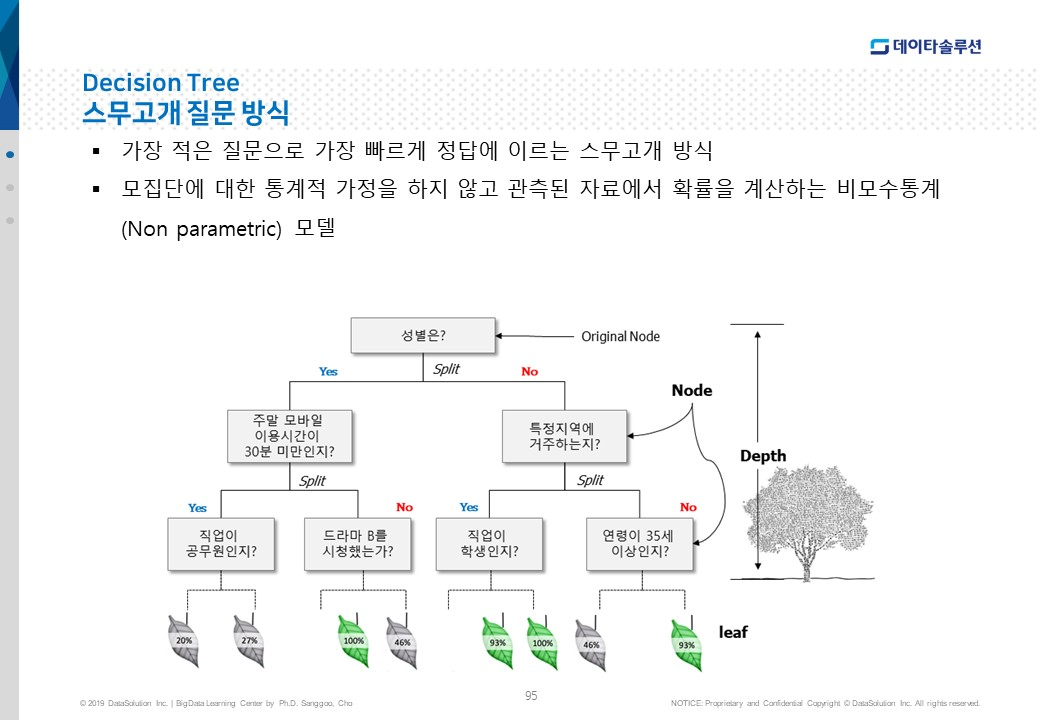

In [120]:
from IPython.display import Image
width=700; height=500
Image(filename='슬라이드95.jpg', width=width, height=height)

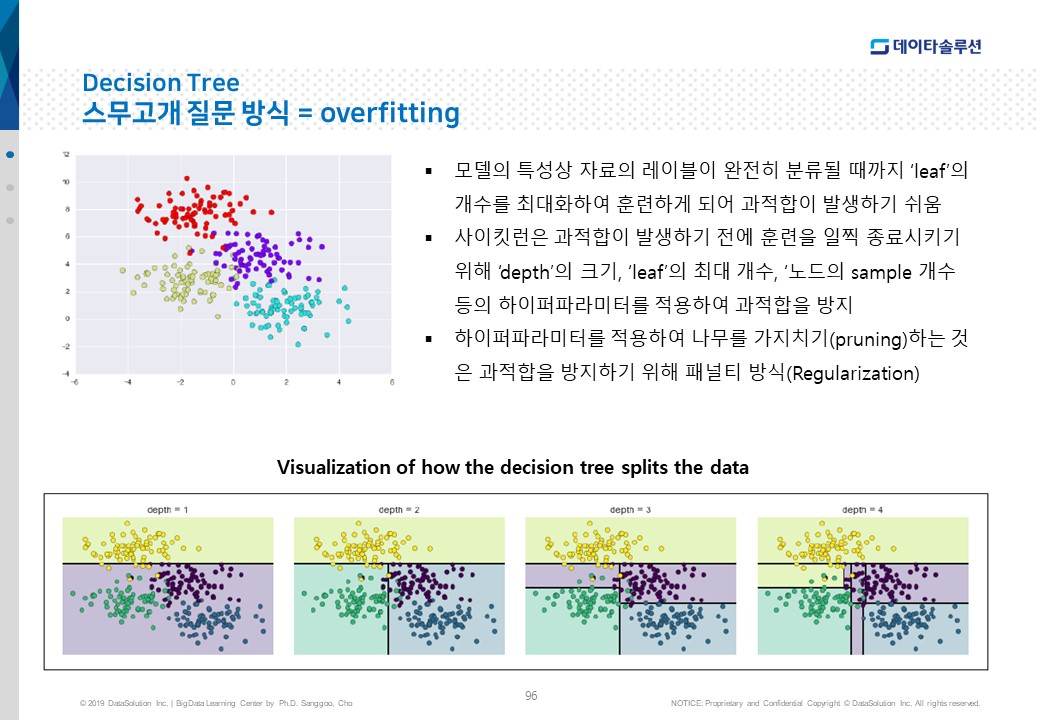

In [121]:
Image(filename='슬라이드96.jpg', width=width, height=height)

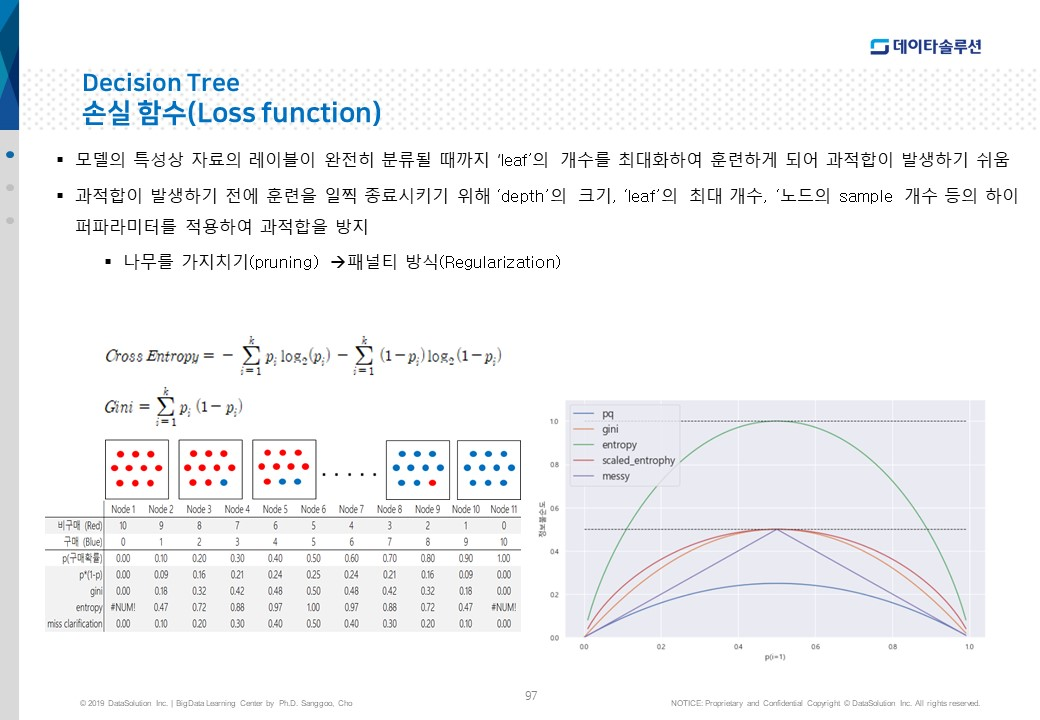

In [122]:
Image(filename='슬라이드97.jpg', width=width, height=height)

## loss function

In [7]:
def pq(p):
   return p*(1 - p)

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def cross_entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def miss_clear(p):
   return 1 - np.max([p, 1 - p])

<Figure size 864x504 with 0 Axes>

(0.0, 1.1)

Text(0.5, 0, 'p(i=1)')

Text(0, 0.5, '정보불순도')

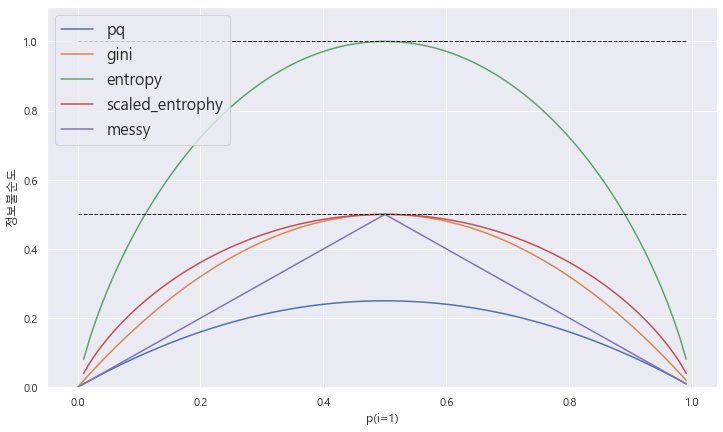

In [8]:
plt.figure(figsize=(12, 7)); plt.rc('legend', fontsize=16)
x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, pq(x), label='pq'); plt.legend()
plt.plot(x, gini(x), label='gini'); plt.legend() # pq*2(이진분류)
plt.plot(x, [cross_entropy(p) if p != 0 else None for p in x],  label='entropy')
plt.legend()
plt.plot(x, cross_entropy(x)*0.5, label='scaled_entrophy'); plt.legend()
plt.plot(x, [miss_clear(i) for i in x], label='messy'); plt.legend()
plt.plot(x, [0.5]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.plot(x, [1.0]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1]); plt.xlabel('p(i=1)'); plt.ylabel('정보불순도')

## 데이터 읽고 훈련시험 데이터 준비

In [9]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
X = pd.DataFrame(data.data, columns= data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X, y)

DecisionTreeClassifier(random_state=11)

### Model interpretability_1. 특성변수 model-based 중요도

랜덤포레스트 모델의 입력변수의 중요도(Impurity 기준)를 X축으로 하여 변수명을 시각화
- '연령’, ‘모바일 평일 이용시간’, ‘모바일 주말 이용시간’ 등이 예측에 크게 영향을 미치고 있다.

In [13]:
dt.feature_importances_

array([0.        , 0.03120753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00877112, 0.        , 0.        ,
       0.007316  , 0.        , 0.        , 0.00204521, 0.00100384,
       0.03747995, 0.        , 0.        , 0.        , 0.        ,
       0.69559352, 0.05735376, 0.        , 0.0110859 , 0.01440488,
       0.        , 0.00747439, 0.12043256, 0.00583135, 0.        ])

<Figure size 1800x432 with 0 Axes>

Text(0, 0.5, 'Features Importance')

Text(0.5, 1.0, '의사결정트리의 변수 중요도')

([<matplotlib.axis.XTick at 0x18728c48be0>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'w

<BarContainer object of 30 artists>

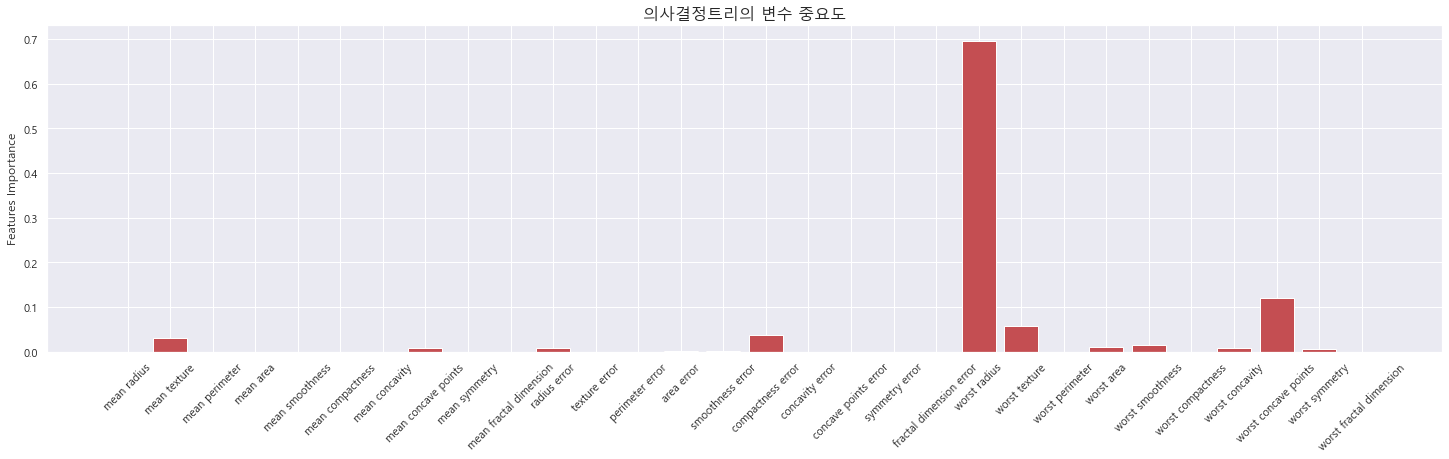

In [14]:
plt.figure(figsize=(25,6)); plt.ylabel('Features Importance')
plt.title('의사결정트리의 변수 중요도', fontsize=16)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation='45')
plt.bar(range(X.shape[1]), dt.feature_importances_, color='r')

In [15]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

### Model interpretability_2. 특성변수 permutation-based 중요도

- 특정 변수의 값을 무작위로 재정렬하여(permutation) 학습하는 경우 모델의 정확도에 영향을 얼마나 주는지를 가리키는 지표
     * model_based’ 중요도의 크기와는 다르다. 사이킷런의 Permutation-based feature importance모듈을 호출
- 예측에 영향을 미치는 입력변수의 중요도가 높은 순서대로 확인

In [16]:
X_test.head()
X_test.iloc[:,0:4].apply(np.random.permutation).head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
186       18.310         18.58          118.60     1041.0          0.08588   
409       12.270         17.92           78.41      466.1          0.08685   
470        9.667         18.49           61.49      289.1          0.08946   
543       13.210         28.06           84.88      538.4          0.08671   
37        13.030         18.42           82.61      523.8          0.08983   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
186           0.08468         0.08169              0.05814         0.1621   
409           0.06526         0.03211              0.02653         0.1966   
470           0.06258         0.02948              0.01514         0.2238   
543           0.06877         0.02987              0.03275         0.1628   
37            0.03766         0.02562              0.02923         0.1467   

     mean fractal dimension  ...  worst radius  worst texture  \
186                 0.05425  ...         21.31          26.36   
409                 0.05597  ...         14.10          28.88   
470                 0.06413  ...         11.14          25.62   
543                 0.05781  ...         14.37          37.17   
37                  0.05863  ...         13.30          22.81   

     worst perimeter  worst area  worst smoothness  worst compactness  \
186           139.20      1410.0           0.12340            0.24450   
409            89.00       610.2           0.12400            0.17950   
470            70.88       385.2           0.12340            0.15420   
543            92.48       629.6           0.10720            0.13810   
37             84.46       545.9           0.09701            0.04619   

     worst concavity  worst concave points  worst symmetry  \
186          0.35380               0.15710          0.3206   
409          0.13770               0.09532          0.3455   
470          0.12770               0.06560          0.3174   
543          0.10620               0.07958          0.2473   
37           0.04833               0.05013          0.1987   

     worst fractal dimension  
186                  0.06938  
409                  0.06896  
470                  0.08524  
543                  0.06443  
37                   0.06169  

[5 rows x 30 columns]

mean radius  mean texture  mean perimeter  mean area
186       11.510         13.86           84.88     1293.0
409       15.460         23.95           71.24      378.2
470        9.333         33.56           59.26      507.9
543       11.600         19.82           68.64      271.3
37        17.930         16.68           61.68      471.3

In [17]:
from sklearn.inspection import permutation_importance
result = permutation_importance(dt, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest_importances = pd.Series(result.importances_mean, index=feature_names)

<Figure size 1800x432 with 0 Axes>

Text(0, 0.5, 'Features Permutation Importance')

Text(0.5, 1.0, '의사결정트리의 변수 Permutation 중요도')

([<matplotlib.axis.XTick at 0x18728e97100>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'w

<BarContainer object of 30 artists>

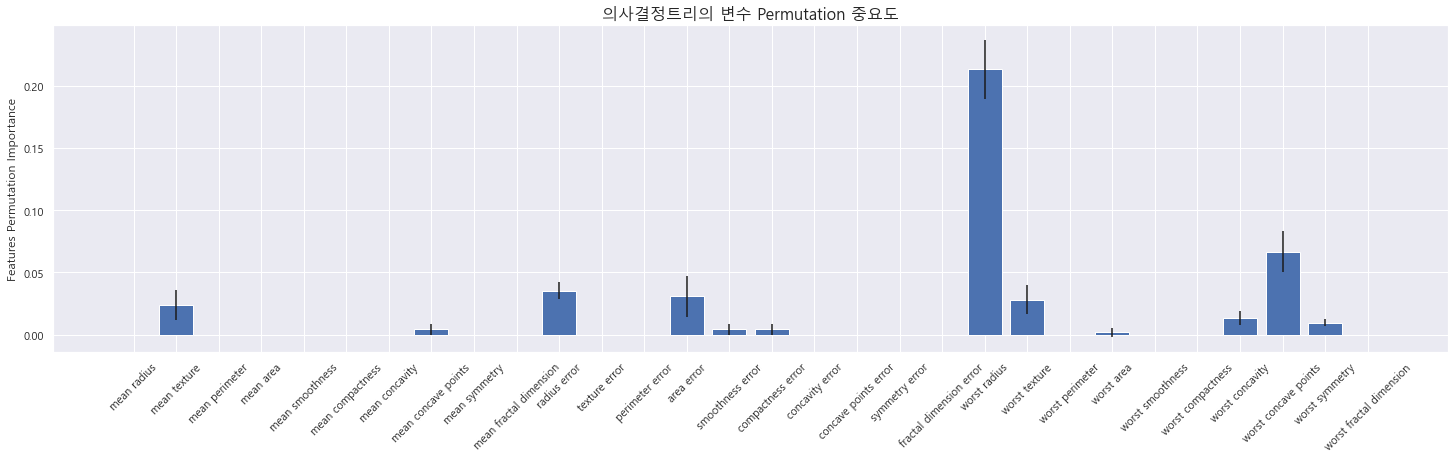

In [18]:
plt.figure(figsize=(25,6)); plt.ylabel('Features Permutation Importance')
plt.title('의사결정트리의 변수 Permutation 중요도', fontsize=16)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation='45')
plt.bar(range(X.shape[1]), forest_importances, yerr=result.importances_std, color='b')

### <font color='dark orange'> Limitations : 변수에 대해 global하게 중요도를 나타내고 있으나 locally, 개별 instance에 대한 예측 결과의 해석은 ? LIME, SHAP

## Hyperparametr Tunining

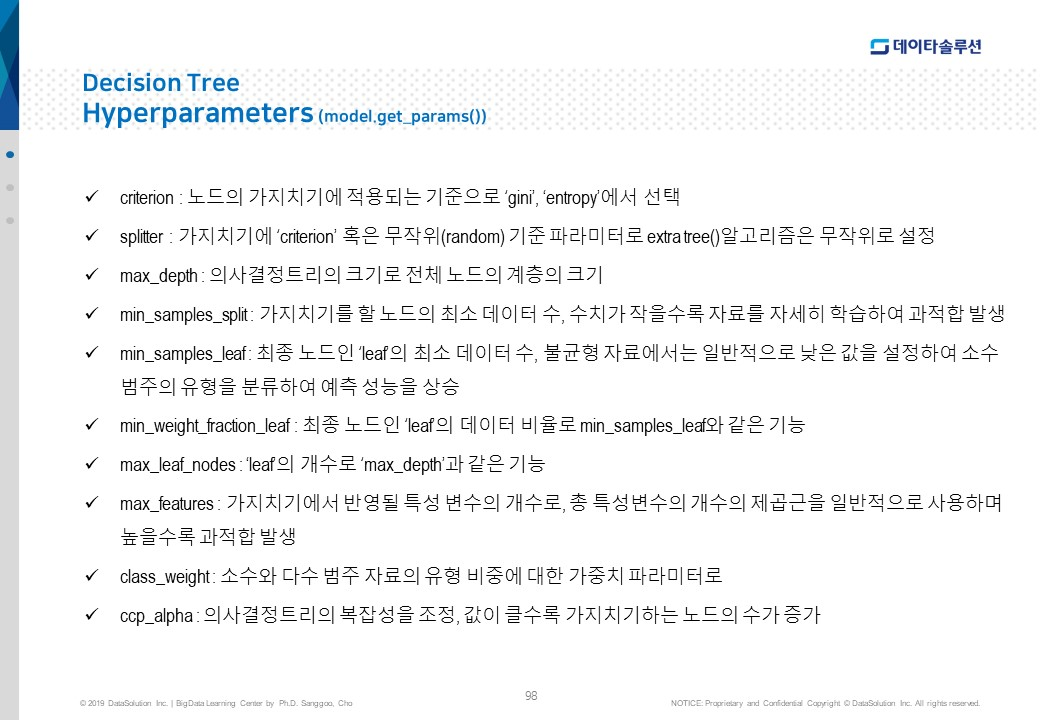

In [123]:
Image(filename='슬라이드98.jpg', width=width, height=height)

In [20]:
params = {
    'criterion' :['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth' : np.arange(1,10),
    'min_samples_split': [0.005, 0.01, 0.05, 0.10],
    'min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [21]:
np.random.seed(1111)
kf = KFold(n_splits=2)
model = DecisionTreeClassifier(random_state=11)
grid = RandomizedSearchCV(model, params, cv=kf, n_iter=50, 
                          scoring = 'recall_macro', verbose =True)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=11), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0.005, 0.01, 0.05,
                                                             0.1],
                                        'min_samples_split': [0.005, 0.01, 0.05,
                                                              0.1],
                                        'splitter': ['best', 'random']},
                   scoring='recall_macro', verbose=True)

In [22]:
print('optimal parameter: {}'.format(grid.best_params_))

optimal parameter: {'splitter': 'best', 'min_samples_split': 0.01, 'min_samples_leaf': 0.01, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'entropy'}


## 중간 학습
- 사용자정의함수 괄호 안의 인자는 사전에 인자를 정하지 않는 경우
     * 일반 인자(*arg)와 키워드 인자(**kwarg)를 사용
- 일반 인자(*arg)와 달리 키워드 인자(**kwarg)는 파이썬의 사전(dictionary)자료 형태인 key와 value를 아는 경우이다

In [23]:
def catch_all(*args, **kwargs):
    print("args =", args)
    print("kwargs =", kwargs)

catch_all(1, 2, 3, 4, a=7, b=5)

args = (1, 2, 3, 4)
kwargs = {'a': 7, 'b': 5}


In [24]:
catch_all('a',keyword=2)

args = ('a',)
kwargs = {'keyword': 2}


In [25]:
catch_all(**{'keyword': 3, 'name': 'ancestor9'})

args = ()
kwargs = {'keyword': 3, 'name': 'ancestor9'}


In [26]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

In [27]:
best_params = grid.best_params_
tuned_params = {item[:]: best_params[item] for item in best_params}
tuned_params

{'splitter': 'best',
 'min_samples_split': 0.01,
 'min_samples_leaf': 0.01,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'entropy'}

In [28]:
model= DecisionTreeClassifier(random_state=11).set_params(**tuned_params)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

In [29]:
model.fit(X_train, y_train)
print("Feature importances:\n{}".format(model.feature_importances_))

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_leaf=0.01, min_samples_split=0.01,
                       random_state=11)

Feature importances:
[0.         0.02471068 0.09861699 0.01175437 0.         0.00750074
 0.04489786 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04934828 0.63832687 0.
 0.11912264 0.         0.00572157 0.         0.         0.        ]


In [30]:
import os
os.makedirs('../data/', exist_ok=True)
os.makedirs('../working/', exist_ok=True)
os.makedirs('../output/', exist_ok=True)

In [31]:
from joblib import dump, load
dump(model, '../output/dt.joblib')

['../output/dt.joblib']

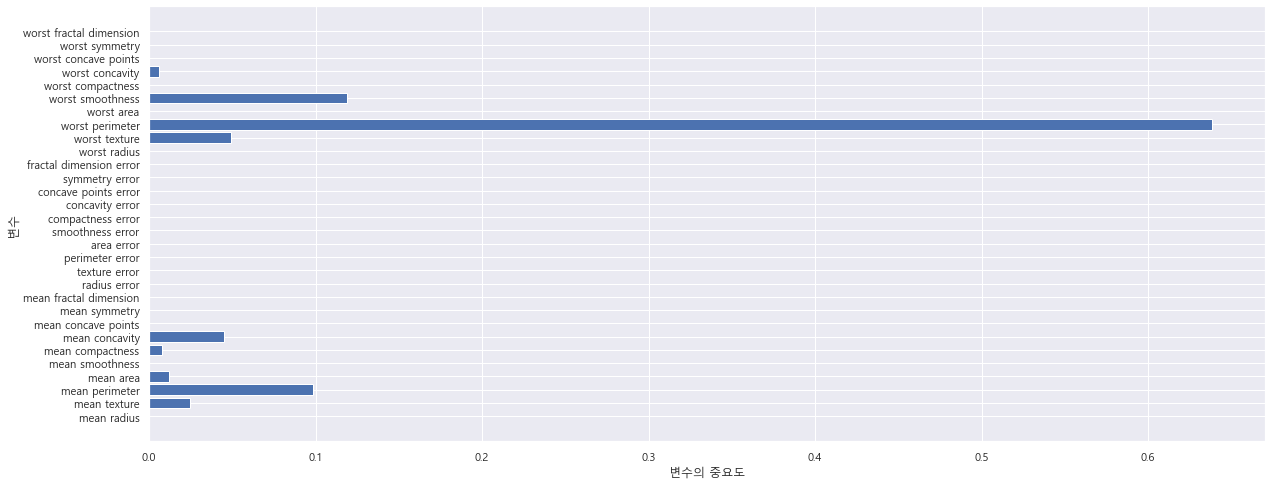

In [32]:
def plot_feature_importances(model):
    fig, ax = plt.subplots(1,1,figsize=(20,8))
    plt.barh(range(X_train.shape[1]), model.feature_importances_, align='center')
    plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
    plt.xlabel('변수의 중요도')
    plt.ylabel('변수')
    plt.savefig('../output/Feature_importance') 
    
plot_feature_importances(model)

In [33]:
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.92      0.92      0.92        72

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



### Overfitting을 방지

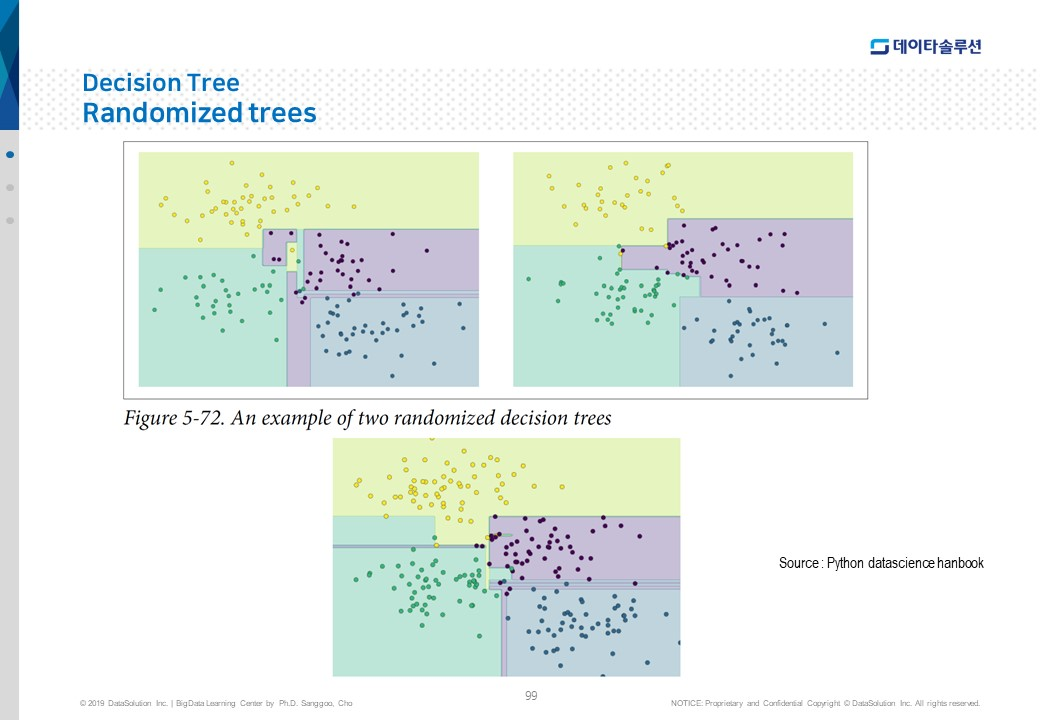

In [125]:
Image(filename='슬라이드99.jpg', width=width, height=height)

## 앙상블(Ensemble)

### One week, Many strong
- Condorcet's jury theorem is a political science theorem about the relative probability of a given group of individuals arriving at a correct decision. The theorem was first expressed by the Marquis de Condorcet in his 1785 work Essay on the Application of Analysis to the Probability of Majority Decisions.

- The assumptions of the simplest version of the theorem are that a group wishes to reach a decision by majority vote. One of the two outcomes of the vote is correct, and each voter has an independent probability p of voting for the correct decision. The theorem asks how many voters we should include in the group. The result depends on whether p is greater than or less than 1/2: 
- https://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem

### 30개의 의사결정 트리를 데이터에 병렬로 학습

In [37]:
X_train.shape

(455, 30)

In [38]:
from sklearn.ensemble import BaggingClassifier
np.random.seed(1357) 
dt = DecisionTreeClassifier(random_state=11)

bag = BaggingClassifier(dt, n_estimators = 30, max_samples =0.8)

y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.9649122807017544

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



<Figure size 1080x432 with 0 Axes>

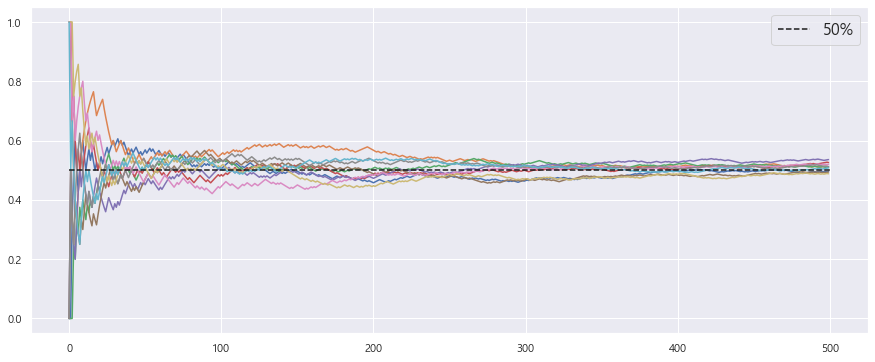

In [39]:
jurors_proba = 0.51
num_jurors = 10; num_trals = 500
num_decisions=(np.random.rand(num_trals, num_jurors)<jurors_proba)*1
total_trials = np.arange(1, num_trals+1).reshape(-1, 1)
cum_right_ratio=np.cumsum(num_decisions, axis=0)/total_trials
plt.figure(figsize=(15,6)); plt.plot(cum_right_ratio)
plt.plot([0, num_trals], [0.5, 0.5], 'k--', label='50%')
plt.legend()

### 모든 데이터에 대해 항상 우월한 알고리즘은 존재하지 않고 상황에 따라 경험적 혹은 정량적으로 결정된다.
### 특정 알고리즘이 우수한 것인 해당 데이터의 패턴을 특정 알고리즘이 fit를 잘 한 것이다.
### 특정 알고리즘을 최적화하여 사용하는 것보다는 몇 개의 알고리즘을 적당하게 Ensemble하는 것이 바람직하다.
### Ensemble almost always work better than the best of breeds, the single best model.

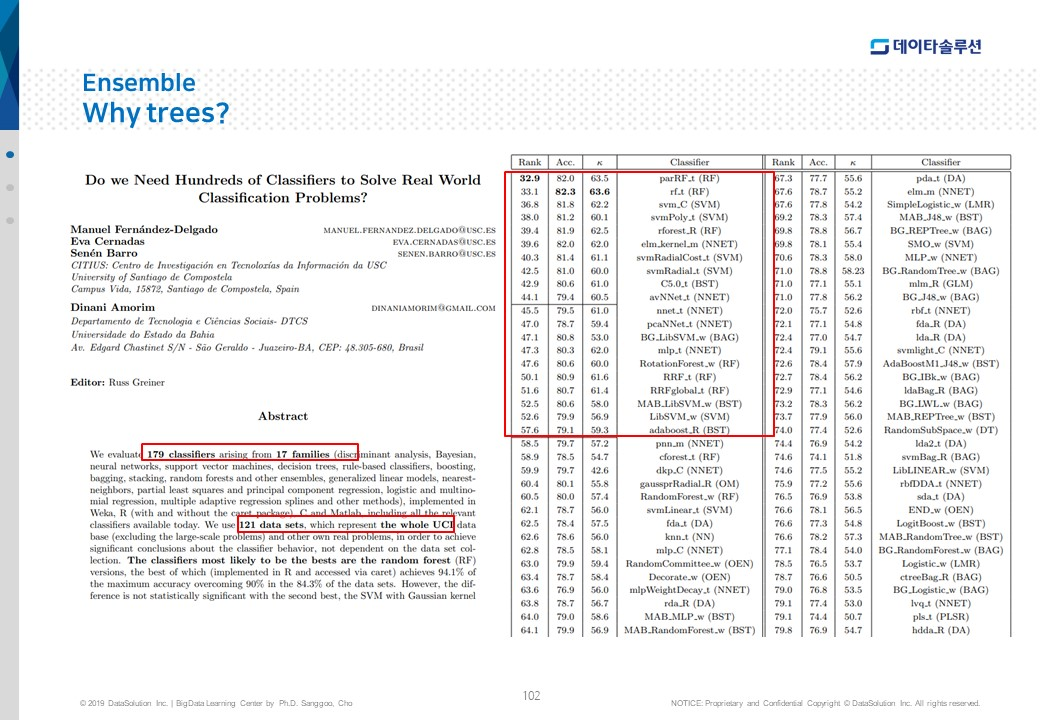

In [127]:
Image(filename='슬라이드102.jpg', width=1200, height=height)

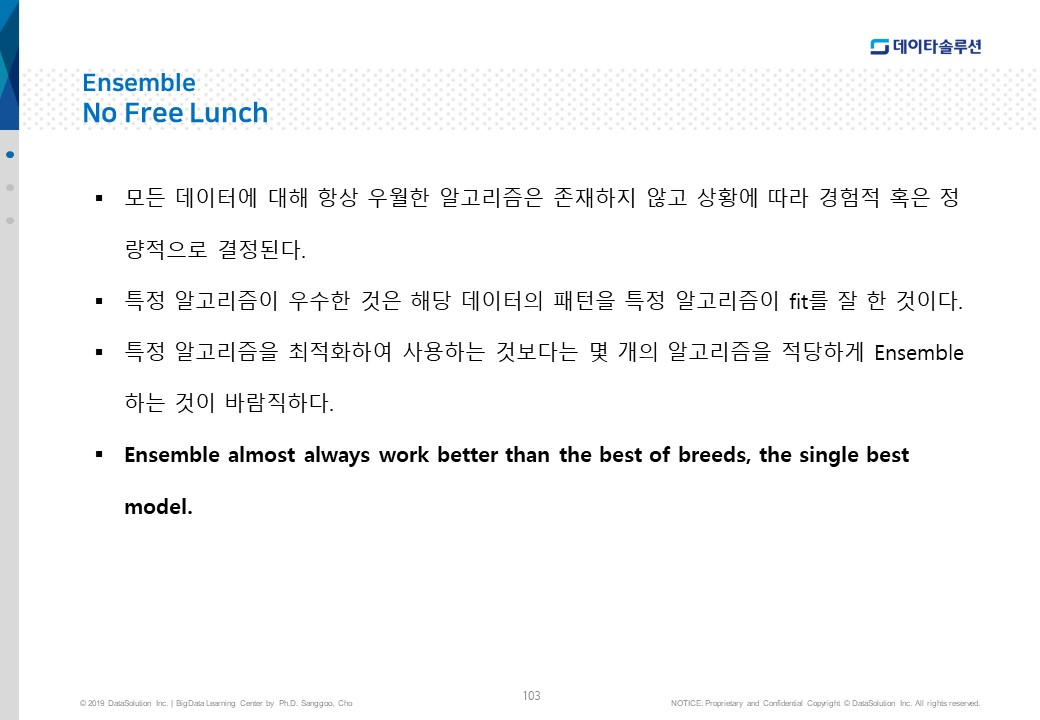

In [128]:
Image(filename='슬라이드103.jpg', width=width, height=height)

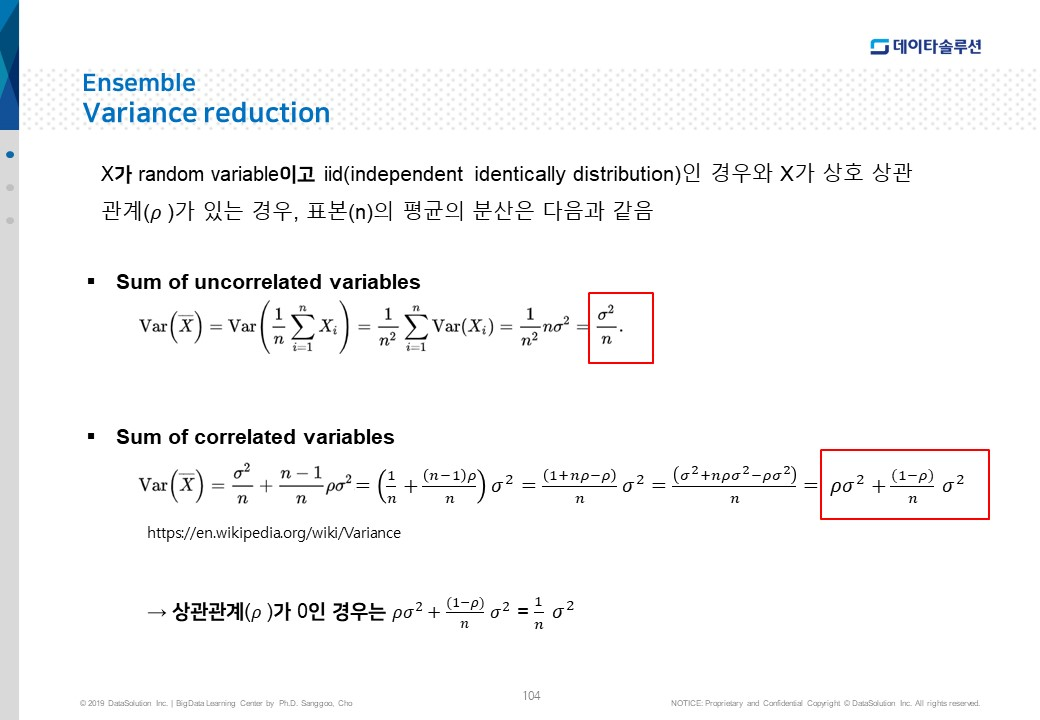

In [129]:
Image(filename='슬라이드104.jpg', width=width, height=height)

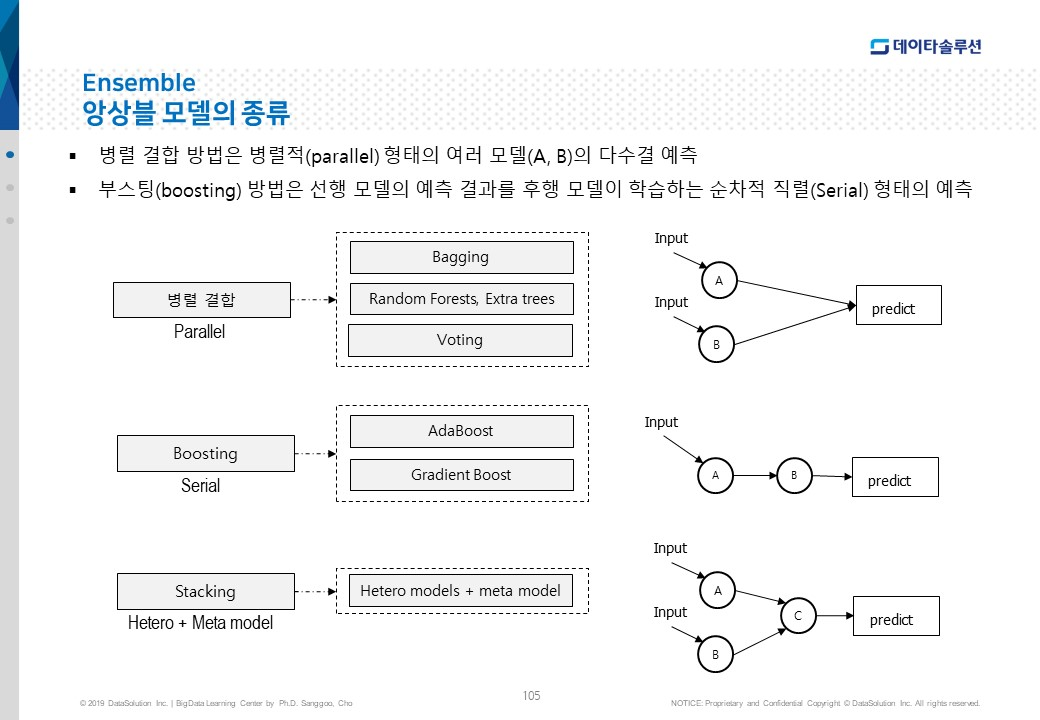

In [130]:
Image(filename='슬라이드105.jpg', width=width, height=height)

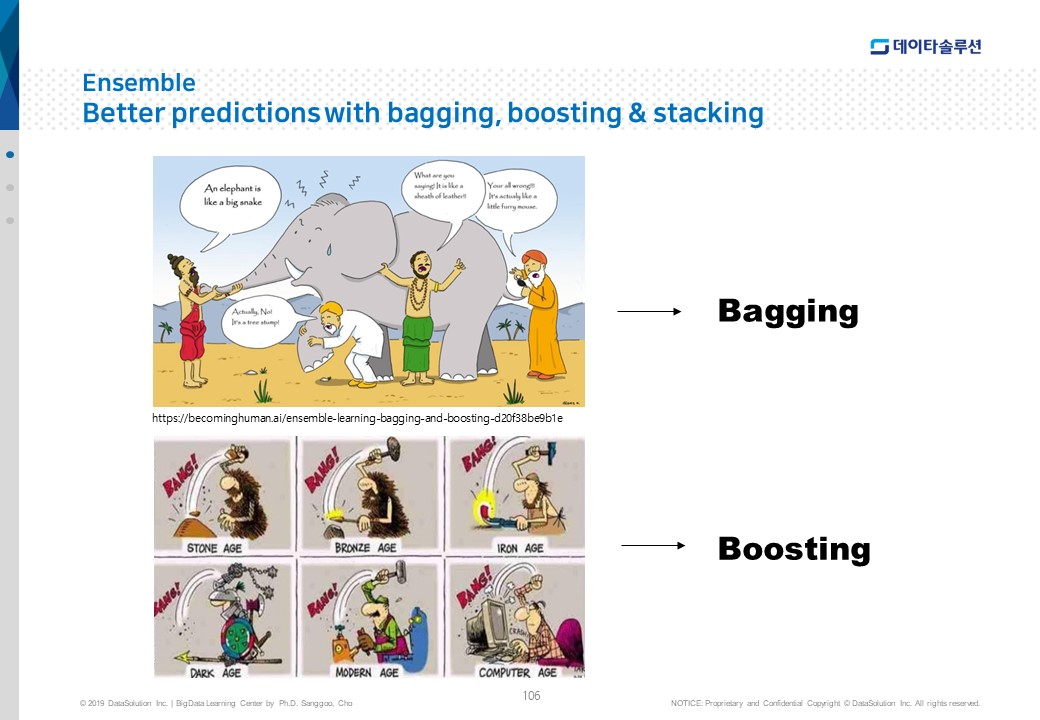

In [131]:
Image(filename='슬라이드106.jpg', width=width, height=height)

# <font color ='red'> Go to 'week_13_boosting using Decision Trees.ipynb'

## Bagging(Bootstrapping aggregation) 알고리즘

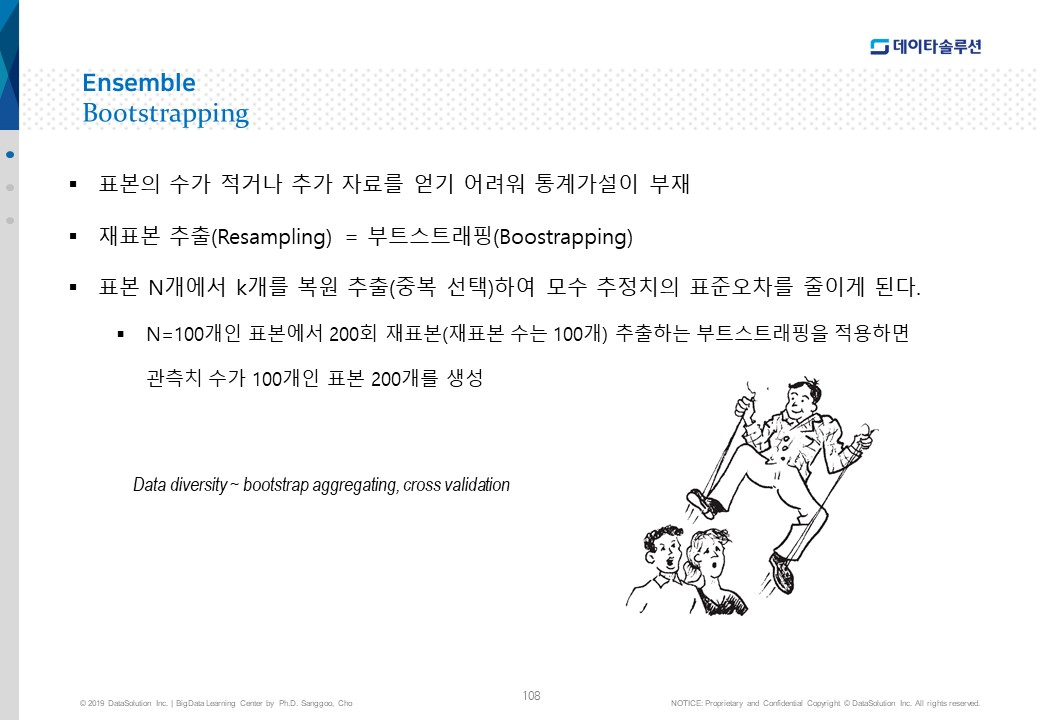

In [133]:
Image(filename='슬라이드108.jpg', width=width, height=height)

### Depth가 '1'인 500개의 Stump로 예측

In [48]:
from sklearn.tree import DecisionTreeClassifier
stump= DecisionTreeClassifier(max_depth=1, random_state=1357)

In [49]:
bag = BaggingClassifier(stump, n_estimators = 500, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.868421052631579

              precision    recall  f1-score   support

           0       0.94      0.69      0.79        42
           1       0.84      0.97      0.90        72

    accuracy                           0.87       114
   macro avg       0.89      0.83      0.85       114
weighted avg       0.88      0.87      0.86       114



In [50]:
BaggingClassifier().get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

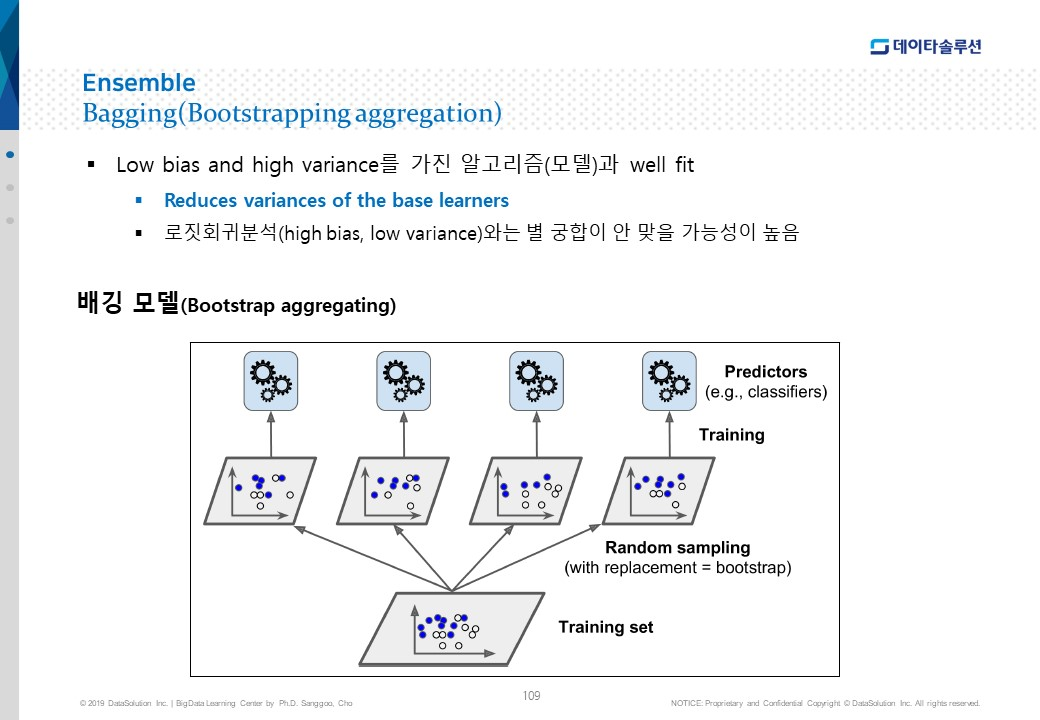

In [134]:
Image(filename='슬라이드109.jpg', width=width, height=height)

## Random Forest 알고리즘
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

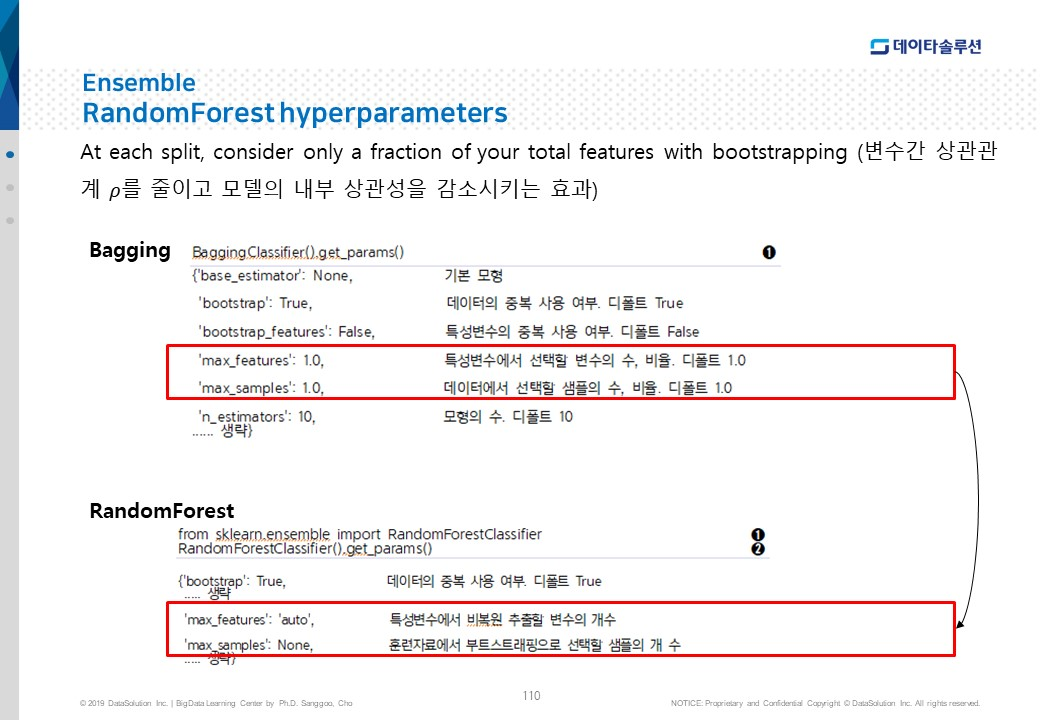

In [135]:
Image(filename='슬라이드110.jpg', width=width, height=height)

In [54]:
X_train.shape

(455, 30)

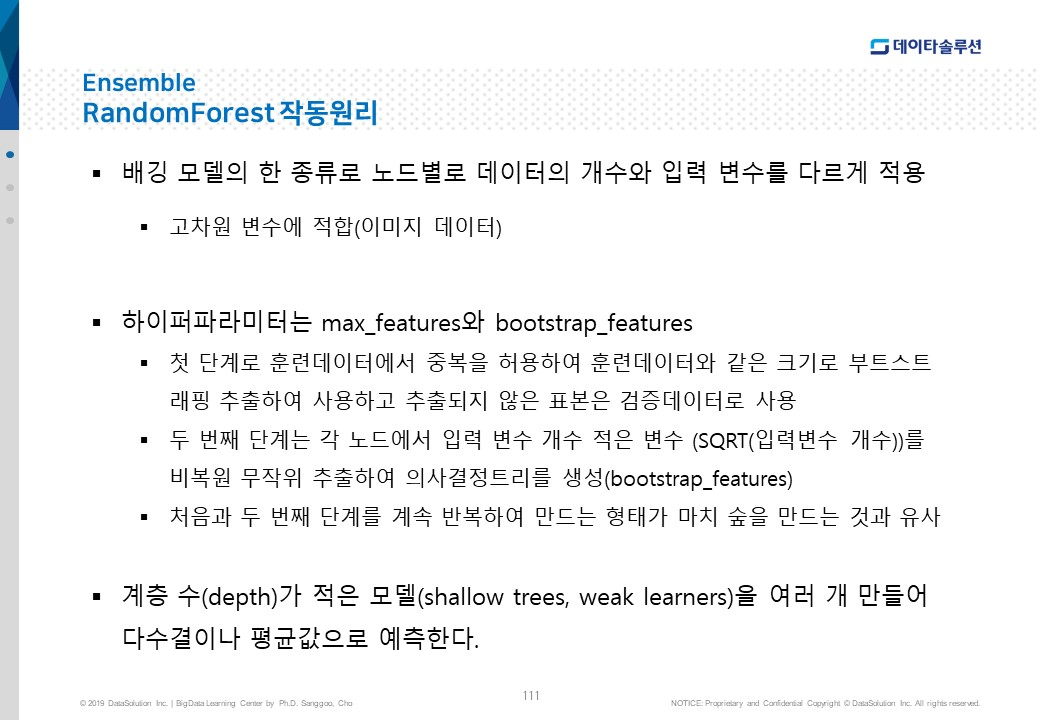

In [136]:
Image(filename='슬라이드111.jpg', width=width, height=height)

In [57]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [59]:
np.random.seed(4321)
rf = RandomForestClassifier(random_state=11)
rf_random = RandomizedSearchCV(rf, random_grid, cv=kf, scoring = 'recall_macro')
y_predict = rf_random.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)

0.956140350877193

In [60]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [61]:
from sklearn.metrics import roc_auc_score, average_precision_score
y_proba = rf_random.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:, 1])
average_precision_score(y_test, y_proba[:, 1])

0.9642857142857142

0.9634756520465959

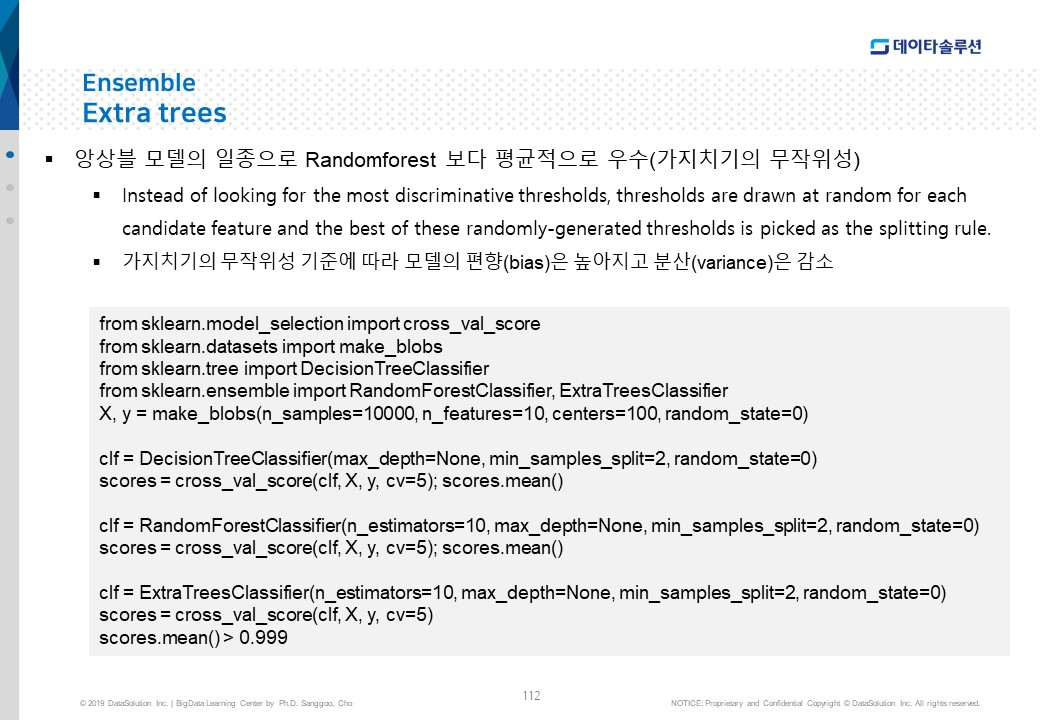

In [137]:
Image(filename='슬라이드112.jpg', width=width, height=height)

### Model Interpretability_3. 특성변수 영향도(partial dependence)

- 사이킷런의 featu#re importance와 permutation importance는 예측에 영향을 미치는 상대적 중요도를 나타낸다. 
- pdp는 예측 확률에 어떻게 영향을 미치는지를 보여준다. 
- 전체 입력변수의 상대적인 중요도가 아닌 개별 변수의 민감도

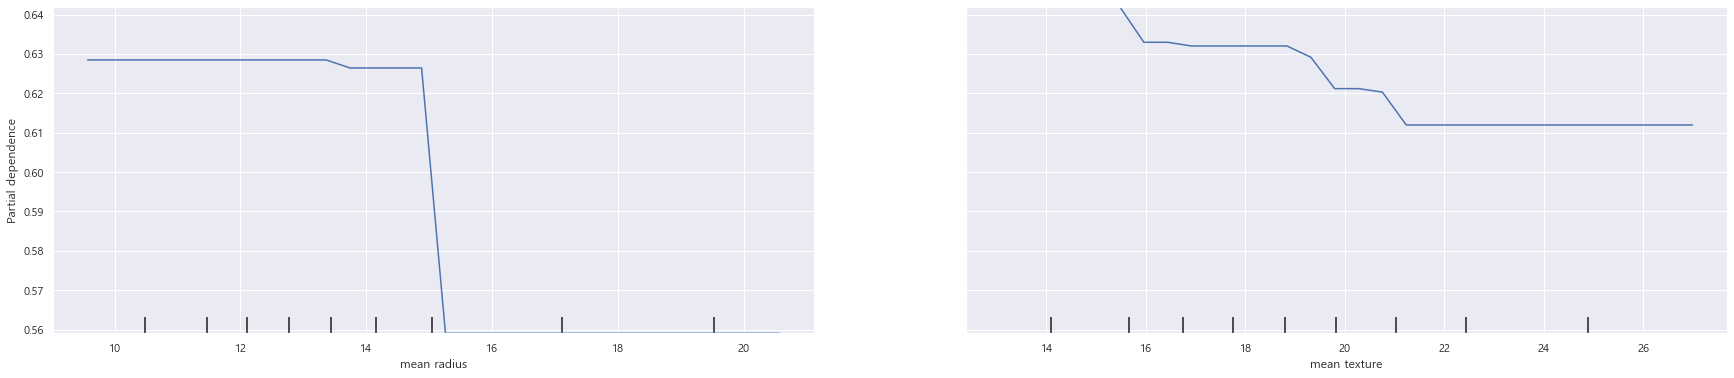

In [62]:
from sklearn.inspection import plot_partial_dependence
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.rcParams['figure.figsize'] = (30,6)
features = ['mean radius', 'mean texture']
plot_partial_dependence(rf_random, X_train, features, n_jobs=3, grid_resolution=30)
fig = plt.gcf(); fig.subplots_adjust(hspace=2)

### Randomforest OOB Error(Out of Bag Error) with bootstrapping(부트스트래핑) 

In [63]:
n = 10000
trials = 10000
print(f'1 회 비복원추출시 뽑힐 확률은 {1/n}')
print(f'1 회 비복원추출시 안 뽑힐 확률은 {(1-1/n)}')
print(f'{trials}번 비복원 추출시 계속 안 뽑힐 확률은 {(1-1/n)**trials}')

1 회 비복원추출시 뽑힐 확률은 0.0001
1 회 비복원추출시 안 뽑힐 확률은 0.9999
10000번 비복원 추출시 계속 안 뽑힐 확률은 0.36786104643297046


In [64]:
rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=1357)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Mean accuracy score: {accuracy:.3}')
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=1357)

Mean accuracy score: 0.965
Out-of-bag score estimate: 0.958


In [65]:
min_estimators = 1; max_estimators = 100
clf = RandomForestClassifier(warm_start=True, oob_score=True,
                             max_features='sqrt', random_state=11)

In [66]:
oob_error_list =[]
for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)
    oob_error = 1 - clf.oob_score_
    oob_error_list.append(oob_error)

RandomForestClassifier(max_features='sqrt', n_estimators=1, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=1, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=2, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=2, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=3, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=3, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=4, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=4, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=5, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=5, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=6, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=6, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=7, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=7, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=8, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=8, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=9, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=9, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=10, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=10, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=11, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=11, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=12, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=12, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=13, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=13, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=14, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=14, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=15, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=15, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=16, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=16, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=17, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=17, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=18, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=18, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=19, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=19, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=20, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=20, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=21, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=21, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=22, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=22, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=23, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=23, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=24, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=24, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=25, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=25, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=26, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=26, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=27, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=27, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=28, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=28, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=29, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=29, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=30, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=30, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=31, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=31, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=33, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=33, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=34, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=34, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=35, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=35, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=36, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=36, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=37, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=37, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=38, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=38, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=39, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=39, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=40, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=40, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=42, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=42, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=43, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=43, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=44, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=44, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=45, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=45, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=46, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=46, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=47, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=47, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=48, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=48, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=49, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=49, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=50, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=50, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=51, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=51, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=52, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=52, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=53, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=53, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=54, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=54, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=55, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=55, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=56, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=56, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=57, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=57, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=58, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=58, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=59, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=59, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=60, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=60, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=61, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=61, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=62, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=62, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=63, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=63, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=64, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=64, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=65, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=65, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=66, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=66, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=67, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=67, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=68, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=68, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=69, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=69, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=70, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=70, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=71, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=71, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=72, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=72, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=73, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=73, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=74, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=74, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=75, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=75, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=76, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=76, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=77, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=77, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=78, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=78, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=79, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=79, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=80, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=80, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=81, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=81, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=82, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=82, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=83, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=83, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=84, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=84, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=85, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=85, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=86, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=86, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=87, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=87, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=88, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=88, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=89, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=89, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=90, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=90, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=91, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=91, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=92, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=92, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=93, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=93, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=94, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=94, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=95, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=95, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=96, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=96, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=97, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=97, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=98, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=98, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=99, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=99, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=11,
                       warm_start=True)

RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=11,
                       warm_start=True)

(1.0, 100.0)

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'OOB error rate')

Text(0.5, 1.0, 'Randomforest with max_features= sqrt')

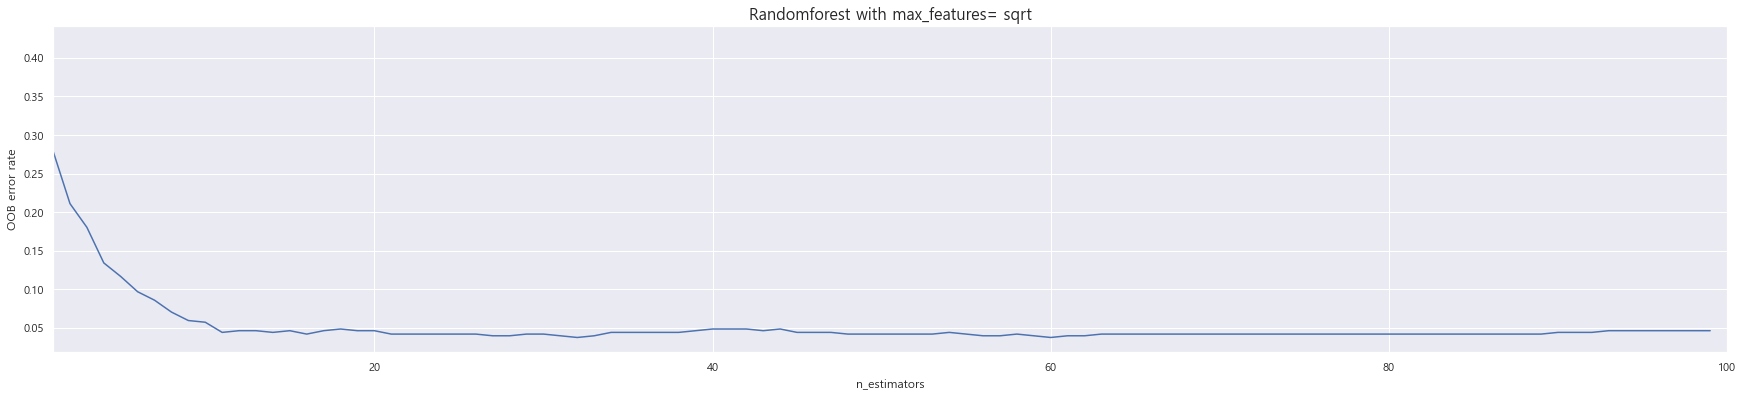

In [67]:
plt.plot(oob_error_list)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators"); plt.ylabel("OOB error rate")
plt.title('Randomforest with max_features= sqrt', fontsize=16)

### 랜덤포레스트의 무작위성(Non-paremetric model)
- 빈 리스트를 만들고 랜덤시드를 서로 다르게 50회 반복하여 훈련과 검증데이터를 만들어 종속변수의 범주 유형 비율의 차이를 그림으로 확인한다. 
- 랜덤 시드가 달라지면 훈련과 검증데이터의 범주 유형 비율이 달라진다는 것을 알 수 있다.
- Non-parametric 통계모델

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,
                                                   random_state =11)

빈 리스트를 만들고 반복문으로 랜덤시드를 무작위로 50회 추출하여 모델을 랜덤 시드와 같이 객체화하고 학습 예측하여 50개 모델의 정확도를 확인한다.

In [69]:
acc_list = []
for i in np.random.choice(250000, 100, replace=False) :
    clf = RandomForestClassifier(n_estimators = 5, random_state = i) 
    clf = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)  
    acc = round(accuracy_score(y_true = y_test, y_pred = preds), 3)
    acc_list.append(acc)

- 50회 학습한 모델의 정확도를 확인하면 랜덤시드별로 정확도는 달라진다. (비모수 통계)

In [70]:
acc_list[0:10]

[0.947, 0.939, 0.956, 0.947, 0.947, 0.93, 0.947, 0.947, 0.947, 0.965]

- 훈련과 검증데이터가 같고 랜덤포레스트 모델에 랜덤시드를 설정하여도 모델의 정확도는 달라진다.

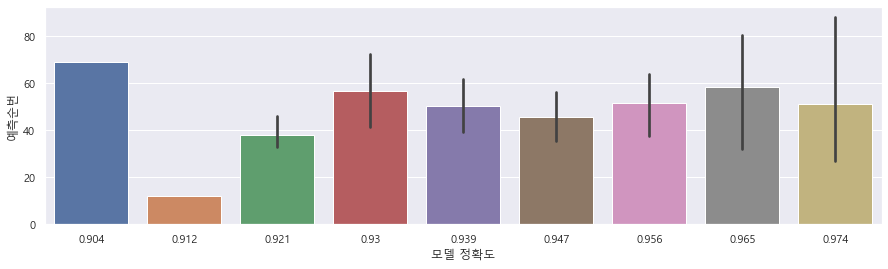

In [71]:
data = (pd.Series(acc_list).reset_index().
        rename(columns={'index': '예측순번', 0: '모델 정확도'}))
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax = sns.barplot(x='모델 정확도', y='예측순번', data=data)

## Random Forest Regression

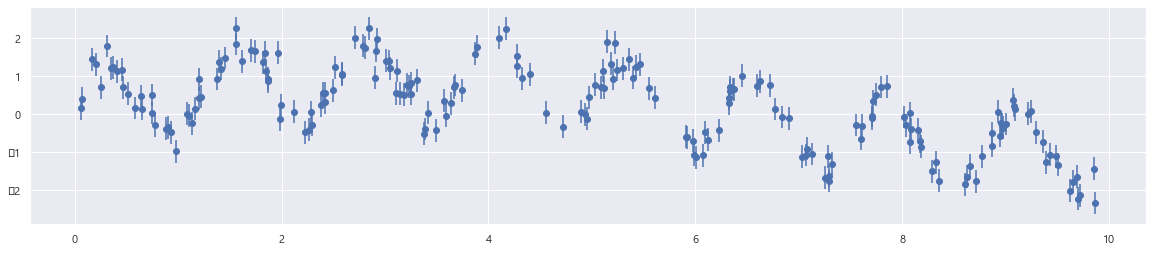

In [72]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)

plt.figure(figsize=(20, 4))
plt.errorbar(x, y, 0.3, fmt='o');

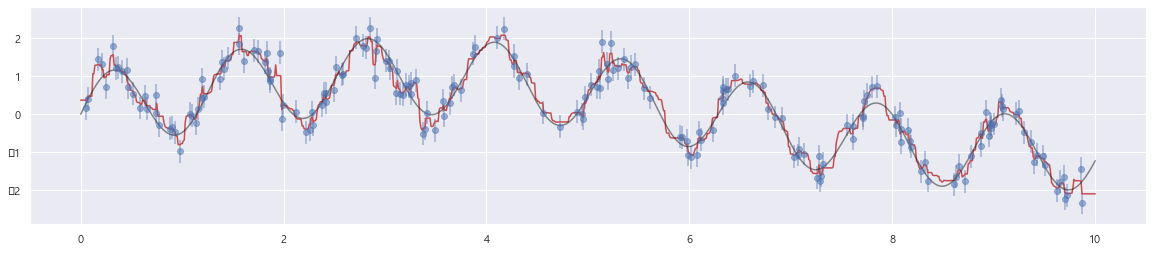

In [73]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.figure(figsize=(20, 4))
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

## VotingClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

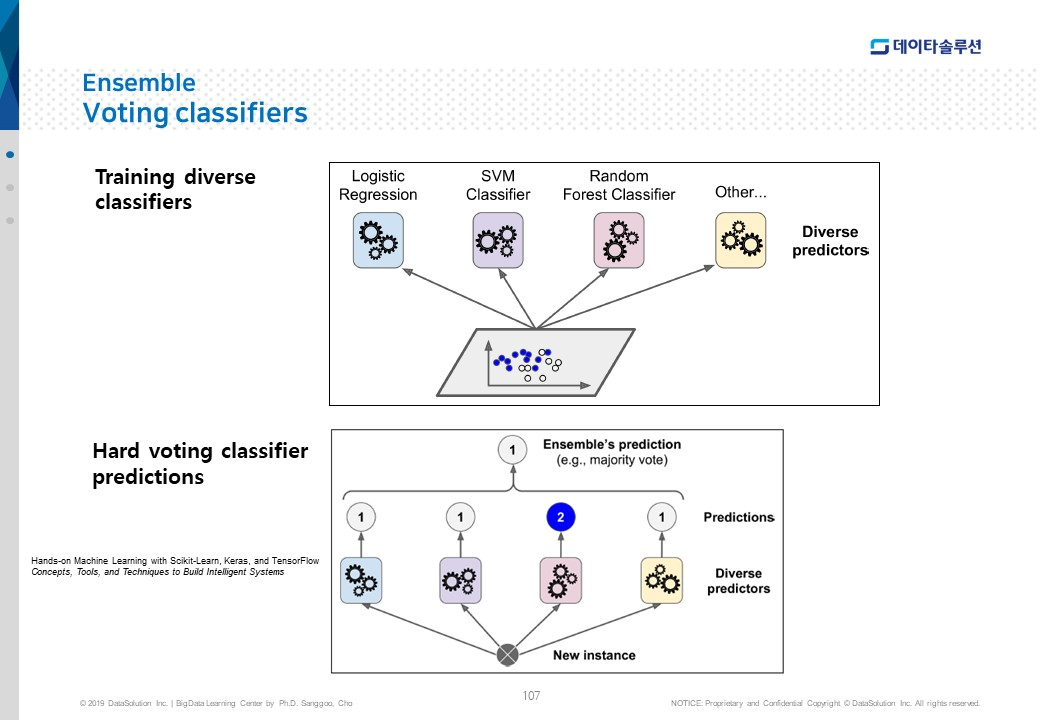

In [132]:
Image(filename='슬라이드107.jpg', width=width, height=height)

In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [76]:
y_train.value_counts(normalize=True)

1    0.626374
0    0.373626
dtype: float64

In [77]:
estimators=[('lgr', LogisticRegression(solver='saga', class_weight='balanced')),
            ('rf',  RandomForestClassifier(class_weight='balanced')),
            ('gnb', GaussianNB())]
eclf = VotingClassifier(estimators, voting='soft')

In [78]:
params = {
    'lgr__C': [0.01, 0.1, 1, 10],
    'lgr__penalty': ['l1', 'l2'],
    'rf__n_estimators': [200],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : [3, 4, 5, 6, 7, 8],
    'rf__criterion' :['gini', 'entropy'],
    'gnb__var_smoothing': [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
}

In [79]:
kf = KFold(n_splits=2)
grid = RandomizedSearchCV(eclf, params, cv = kf,  verbose = 1, n_iter = 5,
                          scoring = 'f1_macro')                 
y_predict = grid.fit(X_train, y_train).predict(X_test)
y_proba = grid.fit(X_train, y_train).predict_proba(X_test)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [80]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        42
           1       0.92      0.99      0.95        72

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



## Boosting 모델
## Adaboosting
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

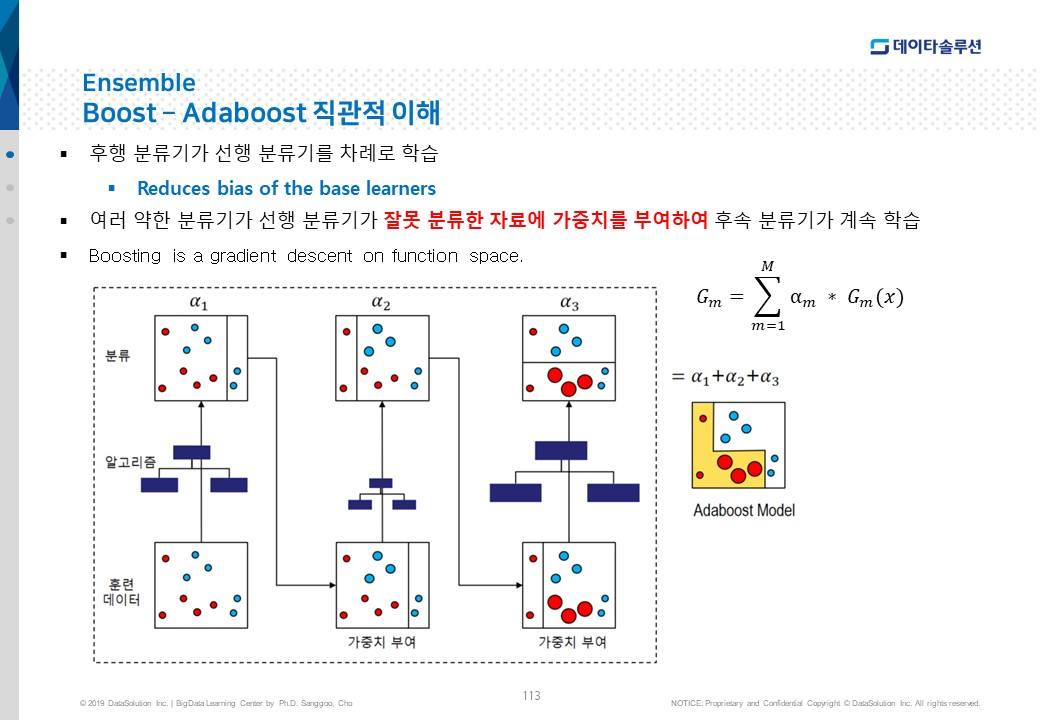

In [138]:
Image(filename='슬라이드113.jpg', width=width, height=height)

In [82]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, random_state=1357)
y_predict = ada_clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)

0.956140350877193

In [83]:
print(classification_report(y_test, y_predict))
y_proba = ada_clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:, 1])
average_precision_score(y_test, y_proba[:, 1])

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



0.9821428571428571

0.9880572527775338

In [84]:
from sklearn.metrics import log_loss
log_loss(y_test, y_proba)

from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1])
y_prob_A = np.array([0.1, 0.9])
y_prob_B = np.array([0.5, 0.5])
brier_score_loss(y_true, y_prob_A);  brier_score_loss(y_true, y_prob_B)

brier_score_loss(y_test, y_proba[:,1])

from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict)

0.48930974252660137

0.009999999999999998

0.25

0.15087438479924273

0.907605465436683

## Gradient Boosting
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

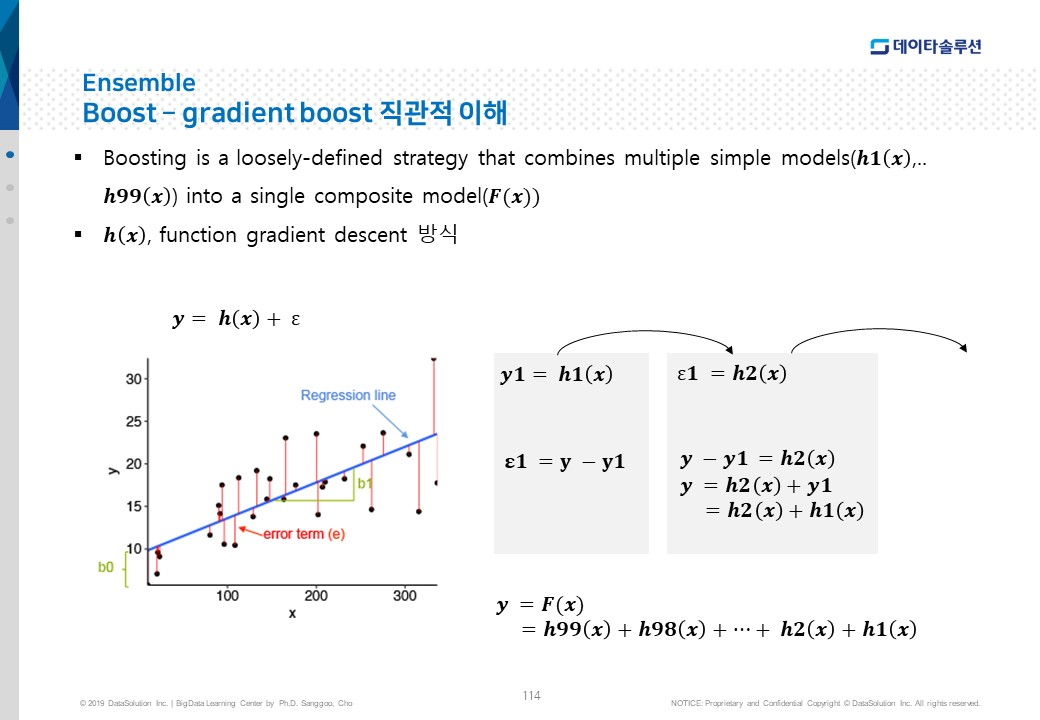

In [139]:
Image(filename='슬라이드114.jpg', width=width, height=height)

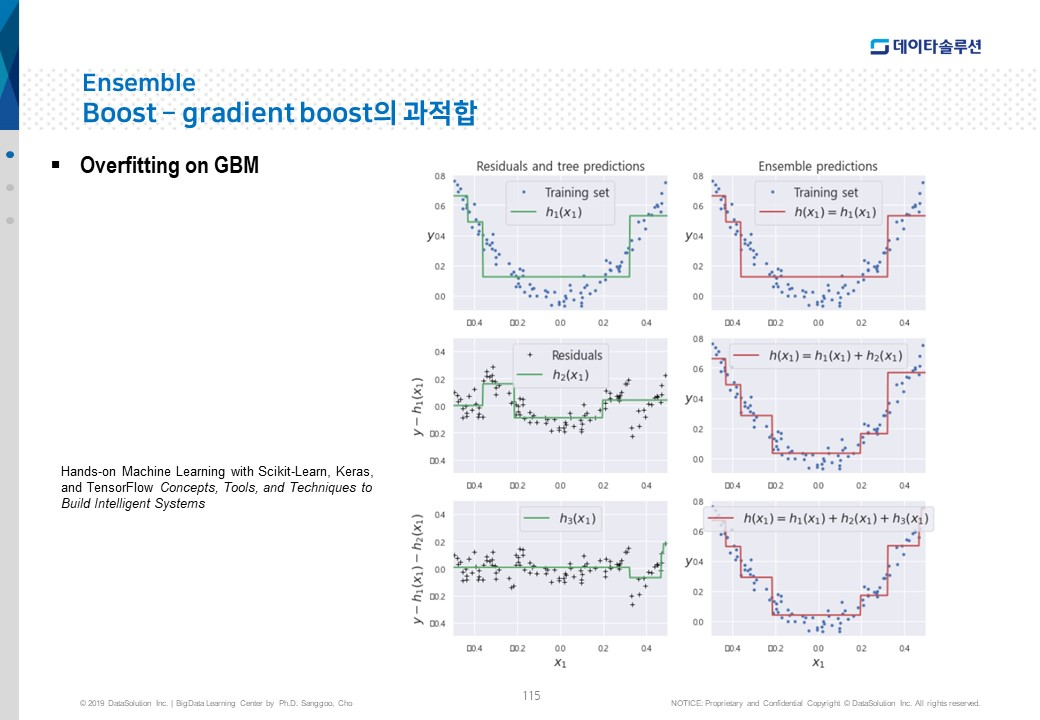

In [140]:
Image(filename='슬라이드115.jpg', width=width, height=height)

### GBM의 과적합(Overfitting)을 줄이는 방법_Regularization

#### 1. Subsample
#### 2. Shrinkage : learning rate
#### 3. Ealry stopping

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(9753)

In [90]:
classifiers = {}
classifiers.update({'Random Forest': RandomForestClassifier()})
classifiers.update({'Gradient Boosting': GradientBoostingClassifier()})
classifiers

{'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier()}

### 앙상블 모델의 대표, 랜덤포레스트와 그레디언트부스팅 

In [91]:
parameters = {}
parameters.update({'Random Forest': 
{ 
'classifier__n_estimators': [50, 100, 150, 200, 250, 300],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [int(x) for x in np.linspace(5, 20, 10)],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__criterion' :['gini', 'entropy']     ,
'classifier__n_jobs': [-1]
}})

In [92]:
parameters.update({'Gradient Boosting': 
{ 
'classifier__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
'classifier__n_estimators': [200],
'classifier__max_depth': [2,3,4,5,6],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__subsample': [0.8, 0.9, 1]
}})

In [93]:
parameters

{'Random Forest': {'classifier__n_estimators': [50, 100, 150, 200, 250, 300],
  'classifier__class_weight': [None, 'balanced'],
  'classifier__max_features': ['auto', 'sqrt', 'log2'],
  'classifier__max_depth': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20],
  'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.1],
  'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.1],
  'classifier__criterion': ['gini', 'entropy'],
  'classifier__n_jobs': [-1]},
 'Gradient Boosting': {'classifier__learning_rate': [0.15,
   0.1,
   0.05,
   0.01,
   0.005,
   0.001],
  'classifier__n_estimators': [200],
  'classifier__max_depth': [2, 3, 4, 5, 6],
  'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.1],
  'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.1],
  'classifier__max_features': ['auto', 'sqrt', 'log2'],
  'classifier__subsample': [0.8, 0.9, 1]}}

In [94]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [95]:
classifiers.items()

dict_items([('Random Forest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier())])

In [96]:
results = {}
for classifier_label, classifier in classifiers.items():
    steps = [ ('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = parameters[classifier_label]
    grid = RandomizedSearchCV(pipeline, param_grid, cv = kf,  n_jobs= -1,
                          n_iter = 5,
                          scoring = 'recall_macro')  
    
    y_pred = grid.fit(X_test, y_test).predict(X_test)
    y_proba = grid.fit(X_test, y_test).predict_proba(X_test)
    y_score = y_proba[:,1]
    
    print('*'*50); print('Classifier name : ', classifier_label )
    print(classification_report(y_test, y_pred))
    
    result = {#'Classifier': classifier_label,
              'Best Parameters': grid.best_params_,
              'Recall_macro': recall_score(y_test, y_pred, average='macro'),
              'AUROC' : roc_auc_score(y_test, y_score),
              'Average PR': average_precision_score(y_test, y_score),
              'F1-score': f1_score(y_test, y_pred),
              'Accuracy': accuracy_score(y_test, y_pred),
              'Log_loss': log_loss(y_test, y_proba),
              'Brier_scor': brier_score_loss(y_test, y_proba[:,1]),
              'MC': matthews_corrcoef(y_test, y_predict)
             }
    
    results.update({classifier_label: result})
    dump(grid.fit(X_train, y_train), '../output/' + classifier_label + '.joblib')

**************************************************
Classifier name :  Random Forest
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



['../output/Random Forest.joblib']

**************************************************
Classifier name :  Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        72

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



['../output/Gradient Boosting.joblib']

In [97]:
pd.DataFrame(results).T

Best Parameters  \
Random Forest      {'classifier__n_jobs': -1, 'classifier__n_esti...   
Gradient Boosting  {'classifier__subsample': 0.8, 'classifier__n_...   

                  Recall_macro     AUROC Average PR  F1-score Accuracy  \
Random Forest         0.940476  0.999669    0.99981  0.966443  0.95614   
Gradient Boosting          1.0       1.0        1.0       1.0      1.0   

                   Log_loss Brier_scor        MC  
Random Forest      0.087206   0.018316  0.907605  
Gradient Boosting  0.000482   0.000001  0.907605

## 1. learning rate에 따른 최적모델
### 1.1 약한 분류기 1,000개로 모델을 객체화하고 학습하여 로그손실을 계산하여 최소 로그손실과 해당하는 의사결정트리의 개수를 확인한다. 
- learning rate = 0.1

GradientBoostingClassifier(max_depth=1, n_estimators=1000, random_state=42)

<Figure size 720x216 with 0 Axes>

Text(95, 0.18601627715607344, 'Minimum')

Text(0.5, 0, 'Number of trees')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Validation log_loss error')

최소 로그손실 값은: 0.18236889917262103
의사결정트리 개수: 95
learning_rate 0.1


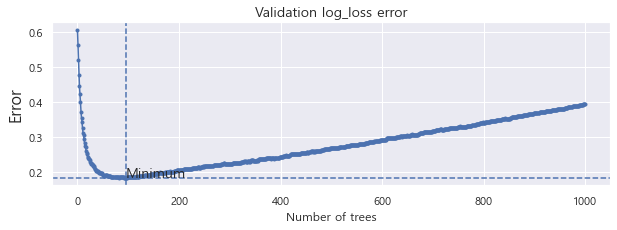

In [98]:
gbrt = GradientBoostingClassifier(max_depth=1, n_estimators=1000, 
                                  random_state=42)
gbrt.fit(X_train, y_train)
errors = [log_loss(y_test, y_proba)
          for y_proba in gbrt.staged_predict_proba(X_test)]

plt.figure(figsize=(10, 3)); plt.plot(errors, "b.-")
plt.axhline(y= np.min(errors), linestyle='--'); plt.axvline(x= np.argmin(errors), linestyle='--')
plt.text(np.argmin(errors), np.min(errors)*1.02, "Minimum", fontsize=14)
plt.xlabel("Number of trees"); plt.ylabel("Error", fontsize=16); plt.title("Validation log_loss error", fontsize=14)

print('최소 로그손실 값은:', np.min(errors))
print('의사결정트리 개수:',np.argmin(errors))
print('learning_rate', gbrt.get_params()['learning_rate'])

### 1.2 약한 분류기 1,000개로 모델을 객체화하고 학습하여 로그손실을 계산하여 최소 로그손실과 해당하는 의사결정트리의 개수를 확인한다. 
#### learning rate = 0.5로 하면 의사결정 트리가 줄어든다

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=1000,
                           random_state=42)

<Figure size 720x216 with 0 Axes>

Text(16, 0.19522648763473527, 'Minimum')

Text(0.5, 0, 'Number of trees')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Validation log_loss error')

최소 로그손실 값은: 0.19139851728895615
의사결정트리 개수: 16
learning_rate 0.5


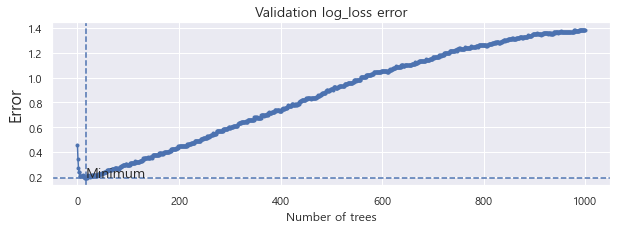

In [99]:
gbrt = GradientBoostingClassifier(max_depth=1, n_estimators=1000, 
                                  learning_rate=0.5, random_state=42)
gbrt.fit(X_train, y_train)
errors = [log_loss(y_test, y_proba)
          for y_proba in gbrt.staged_predict_proba(X_test)]

plt.figure(figsize=(10, 3)); plt.plot(errors, "b.-")
plt.axhline(y= np.min(errors), linestyle='--'); plt.axvline(x= np.argmin(errors), linestyle='--')
plt.text(np.argmin(errors), np.min(errors)*1.02, "Minimum", fontsize=14)
plt.xlabel("Number of trees"); plt.ylabel("Error", fontsize=16); plt.title("Validation log_loss error", fontsize=14)

print('최소 로그손실 값은:', np.min(errors))
print('의사결정트리 개수:',np.argmin(errors))
print('learning_rate', gbrt.get_params()['learning_rate'])

## 조기 종료(Early stopping)
- 1,000개의 분류기를 모두 실행하지 않고 5번에 걸친 학습 결과에도 로그 손실이 개선되지 않으면 학습을 중단시킬 수 있다. 
- 하이퍼파라미터를 ‘warm_start=True’라고 지정하여 선행 모델의 파라미터를 사용하여‘early stopping’ 조건을 넣고 학습한다.
- https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html

GradientBoostingClassifier(max_depth=1, n_estimators=1000, random_state=42)

<Figure size 720x216 with 0 Axes>

Text(95, 0.18601627715607344, 'Minimum')

Text(0.5, 0, 'Number of trees')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Validation log_loss error')

최소 로그손실 값은: 0.18236889917262103
의사결정트리 개수: 95
learning_rate 0.1


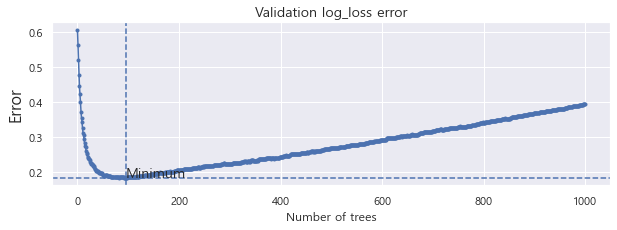

In [100]:
gbrt = GradientBoostingClassifier(max_depth=1, n_estimators=1000, 
                                  random_state=42)
gbrt.fit(X_train, y_train)
errors = [log_loss(y_test, y_proba)
          for y_proba in gbrt.staged_predict_proba(X_test)]

plt.figure(figsize=(10, 3)); plt.plot(errors, "b.-")
plt.axhline(y= np.min(errors), linestyle='--'); plt.axvline(x= np.argmin(errors), linestyle='--')
plt.text(np.argmin(errors), np.min(errors)*1.02, "Minimum", fontsize=14)
plt.xlabel("Number of trees"); plt.ylabel("Error", fontsize=16); plt.title("Validation log_loss error", fontsize=14)

print('최소 로그손실 값은:', np.min(errors))
print('의사결정트리 개수:',np.argmin(errors))
print('learning_rate', gbrt.get_params()['learning_rate'])

# Stacking and Blending model 
- Stacked generalization is a method for combining estimators to reduce their biases .
- More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. 
- This final estimator is trained through cross-validation.

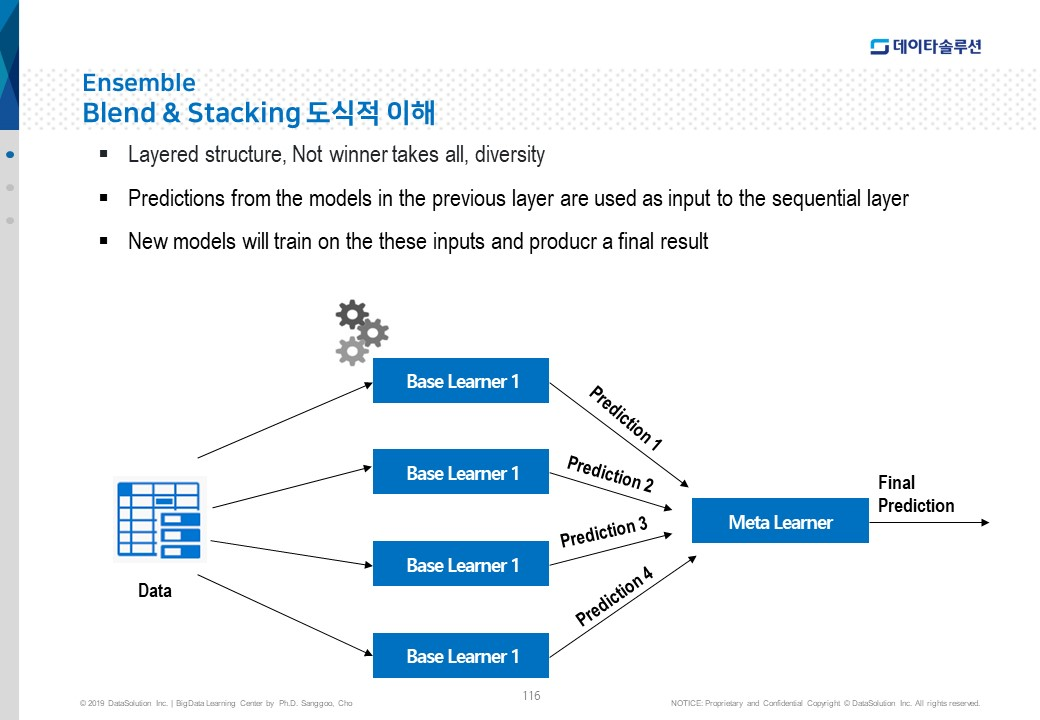

In [142]:
Image(filename='슬라이드116.jpg', width=width, height=height)

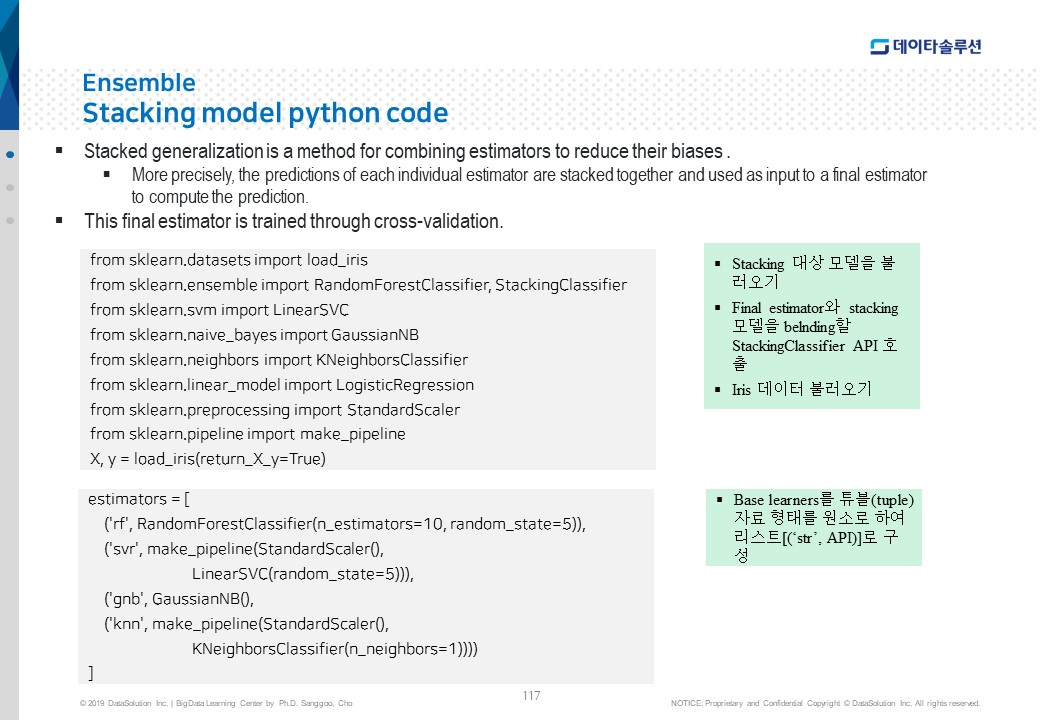

In [145]:
Image(filename='슬라이드117.jpg', width=width, height=height)

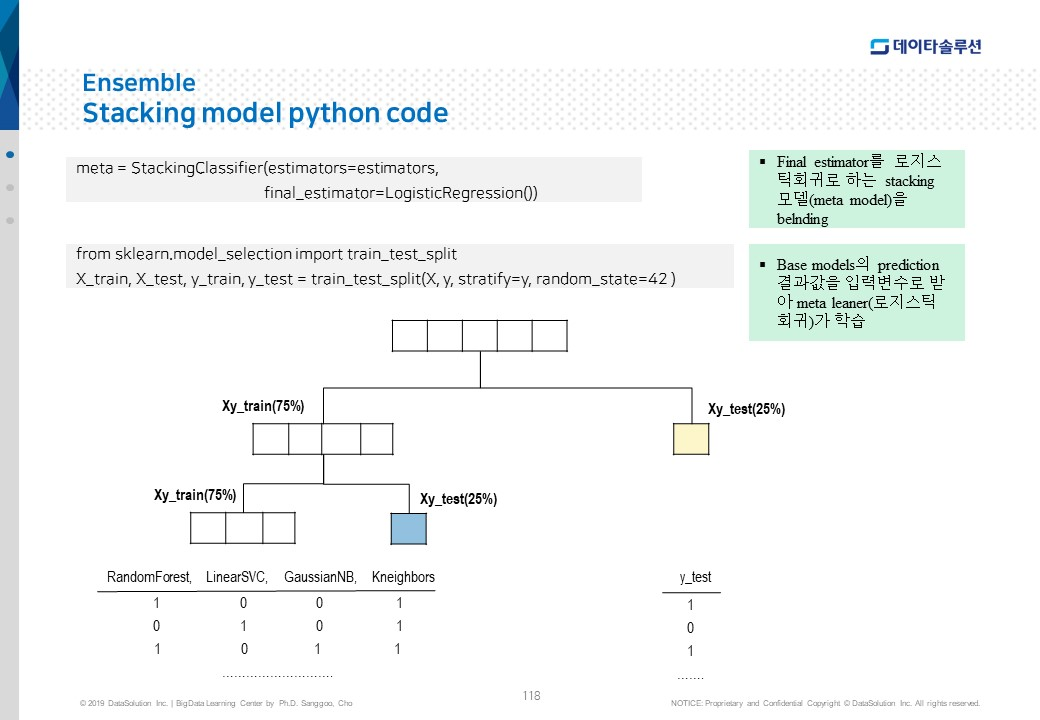

In [146]:
Image(filename='슬라이드118.jpg', width=width, height=height)

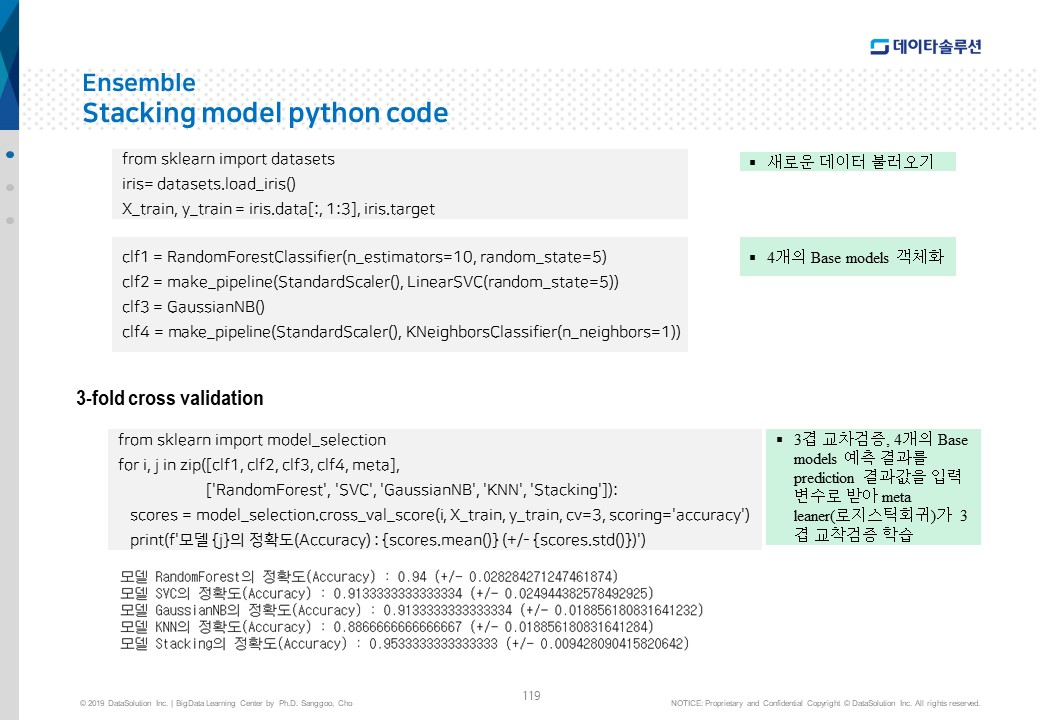

In [147]:
Image(filename='슬라이드119.jpg', width=width, height=height)

## Step 1
- Stacking 대상 모델을 불러오기 
- Final estimator와 stacking 모델을 belnding할 StackingClassifier API 호출
- Iris 데이터 불러오기

In [102]:
from sklearn.datasets import load_iris 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
X, y = load_iris(return_X_y=True)

## Step 2
- base learners  정의
- Base learners를 튜블(tuple)자료 형태를 원소로 하여 리스트[(‘str’, API)]로 구성

In [103]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=5)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=5))),
    ('gnb', GaussianNB(),
    ('knn', make_pipeline(StandardScaler(),
                          KNeighborsClassifier(n_neighbors=1))))
]

## Step 3
- stacking classifiers and meta model 정의
- Final estimator를 로지스틱회귀로 하는  stacking 모델(meta model)을 belnding

In [104]:
meta = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()) 

## Step 4
- Base models의 prediction 결과값을 입력변수로 받아 meta leaner(로지스틱회귀)가 학습

In [105]:
meta.fit(X_train, y_train).score(X_test, y_test) 

0.956140350877193

## Understanding of Stacking and Blending with cross validation
### 4개의 모델로 stacking한 내부 작동방식 이해

## Step 1
- 데이터 불러오기

In [107]:
from sklearn import datasets
iris= datasets.load_iris()
X_train, y_train = iris.data[:, 1:3], iris.target

## Step 2
- 4개의 Base models 객체화

In [108]:
clf1 = RandomForestClassifier(n_estimators=10, random_state=5)
clf2 = make_pipeline(StandardScaler(), LinearSVC(random_state=5))
clf3 = GaussianNB()
clf4 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

## Step 3
- 3겹 교차검증, 4개의 Base models 예측 결과를 prediction 결과값을 입력변수로 받아 meta leaner(로지스틱회귀)가 3 겹 교착검증 학습

In [109]:
meta

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=5)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=5))])),
                               ('gnb', GaussianNB(),
                                ('knn',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('kneighborsclassifier',
                                                  KNeighborsClassifier(n_neighbors=1))])))],
                   final_estimator=LogisticRegression())

In [110]:
from sklearn import model_selection
for i, j in zip([clf1, clf2, clf3, clf4, meta], ['RandomForest', 'SVC', 'GaussianNB', 'KNN', 'Stacking']):
    scores = model_selection.cross_val_score(i, X_train, y_train, cv=3, scoring='accuracy')
    print(f'모델 {j}의 정확도(Accuracy) : {scores.mean()} (+/- {scores.std()})')

모델 RandomForest의 정확도(Accuracy) : 0.94 (+/- 0.028284271247461874)
모델 SVC의 정확도(Accuracy) : 0.9133333333333334 (+/- 0.024944382578492925)
모델 GaussianNB의 정확도(Accuracy) : 0.9133333333333334 (+/- 0.018856180831641232)
모델 KNN의 정확도(Accuracy) : 0.8866666666666667 (+/- 0.018856180831641284)
모델 Stacking의 정확도(Accuracy) : 0.9533333333333333 (+/- 0.009428090415820642)


# Wrap up

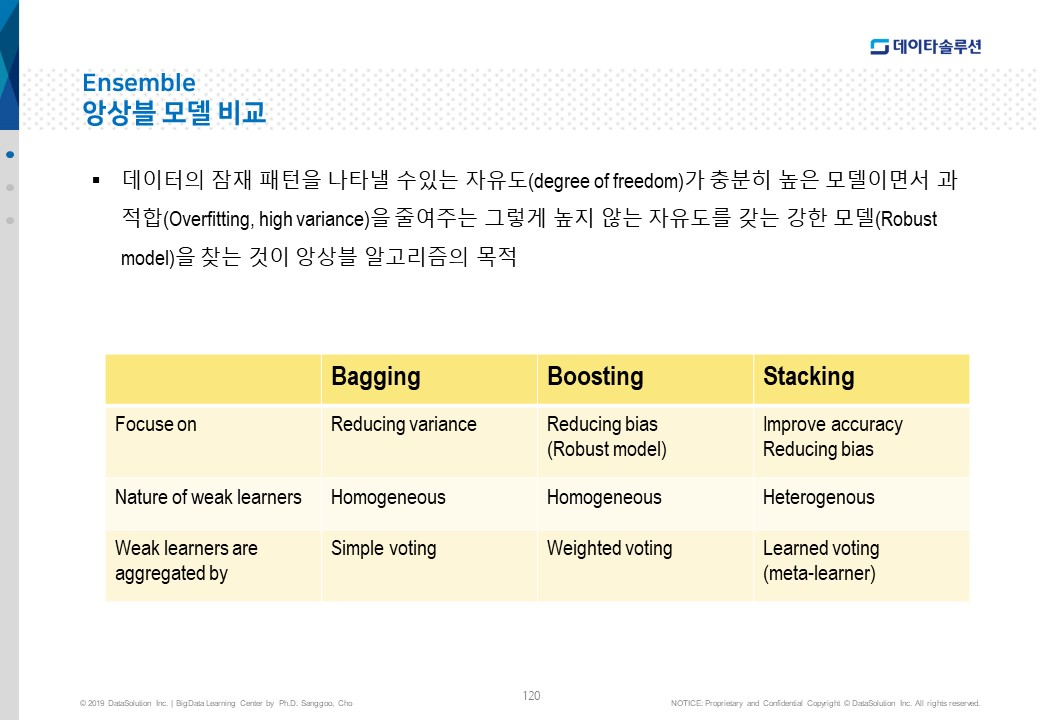

In [148]:
Image(filename='슬라이드120.jpg', width=width, height=height)

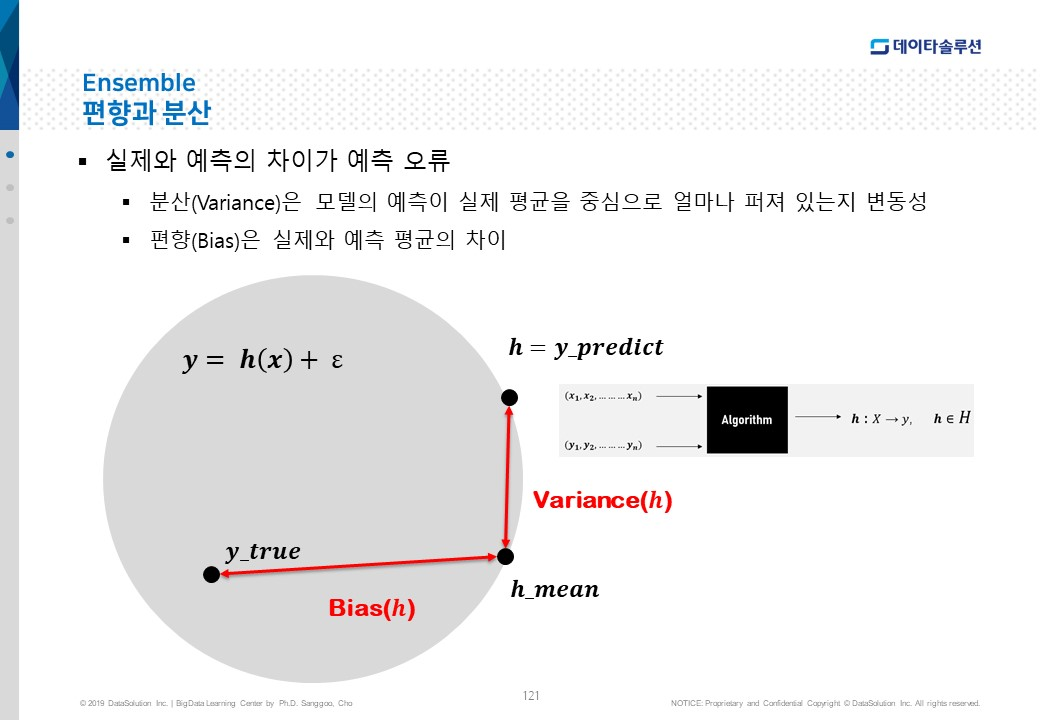

In [149]:
Image(filename='슬라이드121.jpg', width=width, height=height)

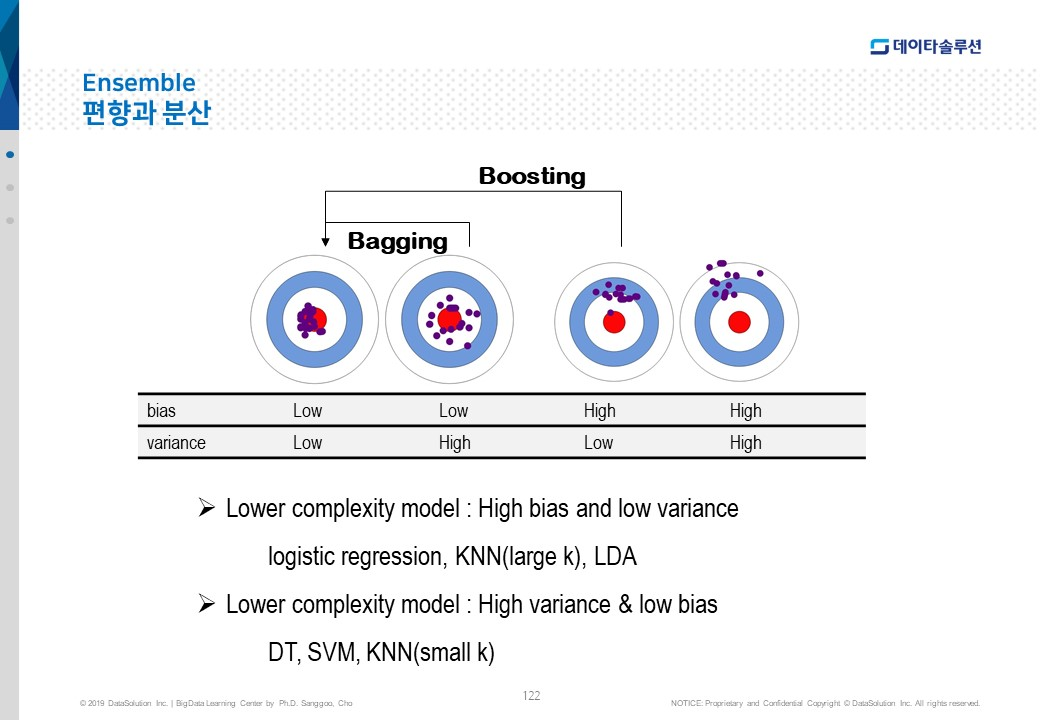

In [150]:
Image(filename='슬라이드122.jpg', width=width, height=height)

# End

### <font color='red'> 실습_Bagging with wine dataset

In [112]:
from sklearn.datasets import load_wine
data  = load_wine()
df = pd.DataFrame(data.data, columns = data['feature_names'])
df['target'] = data.target

df[100::2].loc[df['target'] == 2, 'target']  = 0
df[101::2].loc[df['target'] == 2, 'target']  = 1

X = df[data['feature_names']]
y = df['target']

In [113]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

In [114]:
stump= DecisionTreeClassifier(max_depth=1, random_state=1355) # very weak decesion tree algorithm (1 depth)

bag = BaggingClassifier(stump, 
                        n_estimators = 500, 
                        max_samples =0.8)

y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.8888888888888888

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.86      0.95      0.90        19

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



### <font color='red'> 실습_Randomforest with boston_house dataset - Regression

In [115]:
from sklearn import datasets
dataset = datasets.load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

mean = df['target'].mean()
df['target'] = df['target']

X = df[df.columns[0:-1]] # X = df.drop(['target'], axis=1)
y = df['target']

In [116]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=11)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test) # Return the coefficient of determination R^^2 of the prediction.

RandomForestRegressor(max_depth=2, random_state=0)

0.6676077608382254

# End